# EDA

1. [Daily Dataset](#1-daily-dataset)
2. [Half Hourly Dataset](#2-half-hourly-dataset)
3. [HHBlock Dataset](#3-hhhblock-dataset)
4. [Acorn Details](#4-acorn-details)
5. [Daily Dataset](#5-daily-dataset)
6. [Informations Households](#6-informations-households)
7. [UK Bank Holidays](#7-uk-bank-holidays)
8. [Weather Daily Darksky](#8-weather-daily-darksky)
9. [Weather Hourly Darksky](#9-weather-hourly-darksky)

---

## Import Libraries

In [ ]:
# Imports
import pandas as pd
import glob
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import math
from wordcloud import WordCloud

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


---

## <div id="1-daily-dataset"> 1. Daily Dataset </div>
`daily_dataset`

In [ ]:
# # Combine data

# # Define the folder containing the CSV files
# file_name = "1. daily_dataset"
# folder_path = f"Data/{file_name}/"

# # Get a sorted list of all CSV files matching "block_X.csv"
# csv_files = sorted(glob.glob(os.path.join(folder_path, "block_*.csv")), 
#             key=lambda x: int(os.path.basename(x).split("_")[1].split(".")[0]))

# # Read and merge all CSV files
# df_list = [pd.read_csv(file) for file in csv_files]
# merged_df = pd.concat(df_list, axis=0, ignore_index=True)

# # Save the merged DataFrame to a single CSV file
# output_path = f"Data/{file_name}.csv"
# merged_df.to_csv(output_path, index=False)

# print(f"Merged CSV saved to {output_path}")

In [ ]:
# # Delete original folder
# shutil.rmtree(folder_path)
# print(f"Deleted folder: {folder_path}")

In [2]:
# Read data
df1 = pd.read_csv("Data/1. daily_dataset.csv")
df1.head()

LCLid         day  energy_median  energy_mean  energy_max  \
0  MAC000002  2012-10-12         0.1385     0.154304       0.886   
1  MAC000002  2012-10-13         0.1800     0.230979       0.933   
2  MAC000002  2012-10-14         0.1580     0.275479       1.085   
3  MAC000002  2012-10-15         0.1310     0.213688       1.164   
4  MAC000002  2012-10-16         0.1450     0.203521       0.991   

   energy_count  energy_std  energy_sum  energy_min  
0            46    0.196034       7.098       0.000  
1            48    0.192329      11.087       0.076  
2            48    0.274647      13.223       0.070  
3            48    0.224483      10.257       0.070  
4            48    0.184115       9.769       0.087

In [3]:
# Print shape & columns
df1_shape = df1.shape
print(f"The shape of `df1` is: {df1_shape}")

df1_columns = df1.columns
df1_columns_count = len(df1_columns)
print(f"\n`df1` contains {df1_columns_count} columns: \n{df1_columns}")

The shape of `df1` is: (3510433, 9)

`df1` contains 9 columns: 
Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')


In [4]:
# Display basic info
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB
None
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   3.510403e+06  3.510403e+06  3.510403e+06  3.510433e+06  3.499102e+06   
mean    1.587395e-01  2.117305e-01  8.345210e-01  4.780364e+01  1.726673e-01   
std     1.701865e-01  1.908460e-01  6.683156e-01  2.810982e+00  1.531208e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6.700000e-02  9.808333e-02  3.460000e-01  4.800000e+01  6.911626e-02   
50%     1.145000e-01  1.632917e

In [6]:
# Check missing values
print(df1.isnull().sum())

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64


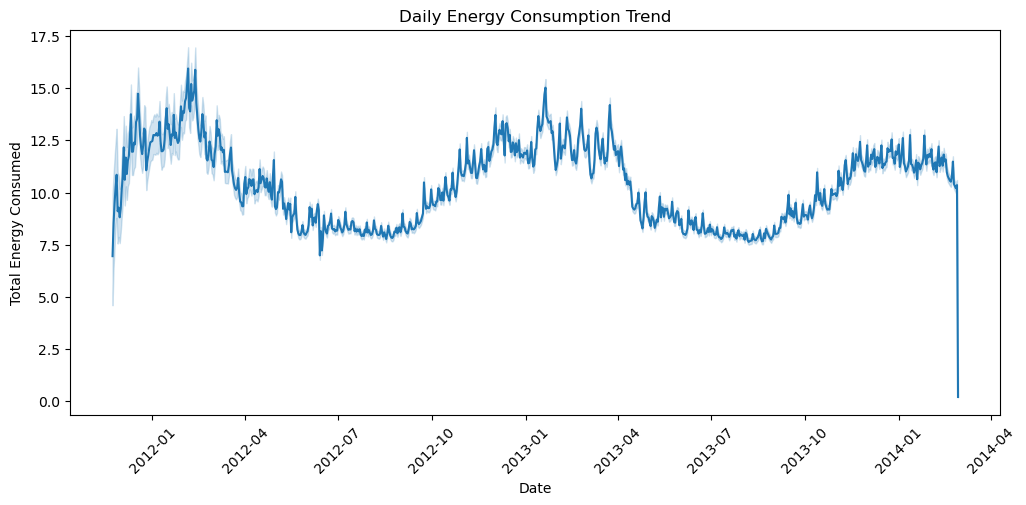

In [7]:
# Time Series Trend of Energy Consumption
plt.figure(figsize=(12, 5))
sns.lineplot(x='day', y='energy_sum', data=df1)
plt.title('Daily Energy Consumption Trend')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumed')
plt.xticks(rotation=45)
plt.show()

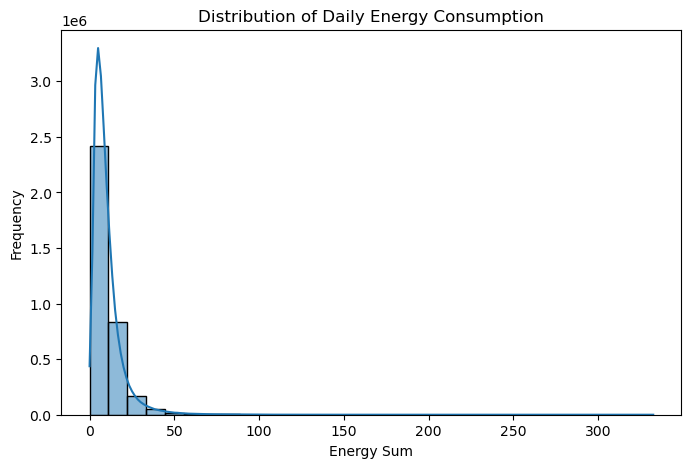

In [8]:
# Distribution of Energy Consumption
plt.figure(figsize=(8, 5))
sns.histplot(df1['energy_sum'], bins=30, kde=True)
plt.title('Distribution of Daily Energy Consumption')
plt.xlabel('Energy Sum')
plt.ylabel('Frequency')
plt.show()

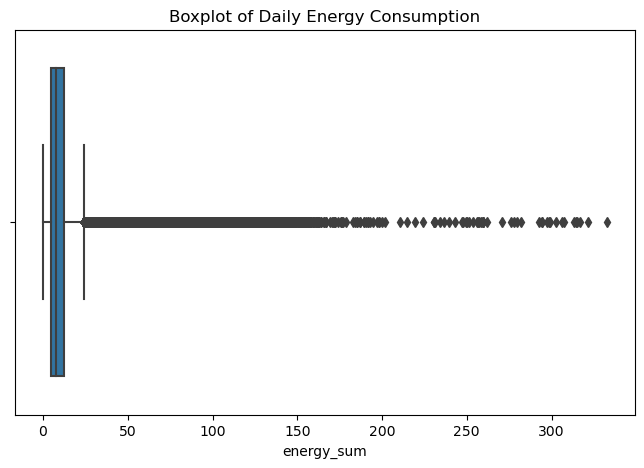

In [9]:
# Boxplot to Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['energy_sum'])
plt.title('Boxplot of Daily Energy Consumption')
plt.show()

/var/folders/b_/6l6rrpzs5yqd2b5_sl147sq40000gn/T/ipykernel_8885/1467673560.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")


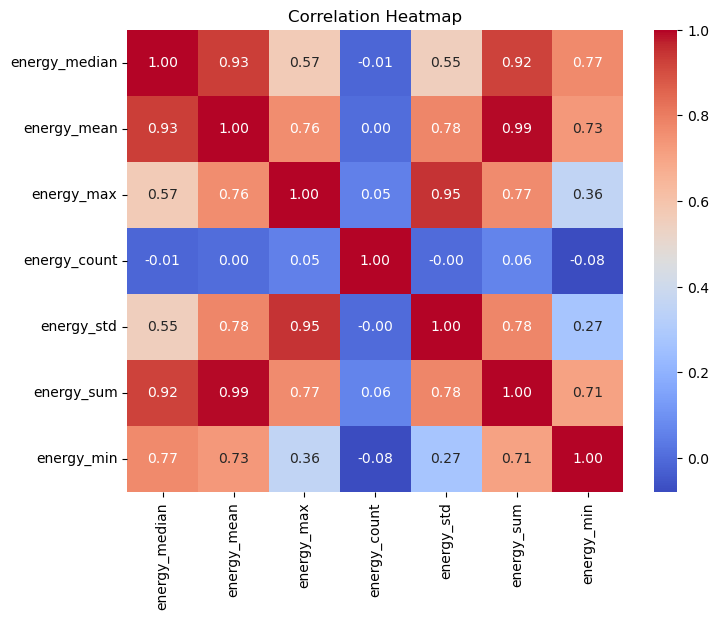

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---

## <div id="2-half-hourly-dataset"> 2. Half Hourly Dataset </div>
`halfhourly_dataset`

In [ ]:
# # Combine data

# # Define the folder containing the CSV files
# file_name = "2. halfhourly_dataset"
# folder_path = f"Data/{file_name}/"

# # Get a sorted list of all CSV files matching "block_X.csv"
# csv_files = sorted(glob.glob(os.path.join(folder_path, "block_*.csv")), 
#             key=lambda x: int(os.path.basename(x).split("_")[1].split(".")[0]))

# # Read and merge all CSV files
# df_list = [pd.read_csv(file) for file in csv_files]
# merged_df = pd.concat(df_list, axis=0, ignore_index=True)

# # Save the merged DataFrame to a single CSV file
# output_path = f"Data/{file_name}.csv"
# merged_df.to_csv(output_path, index=False)

# print(f"Merged CSV saved to {output_path}")

In [ ]:
# # Delete original folder
# shutil.rmtree(folder_path)
# print(f"Deleted folder: {folder_path}")

In [61]:
# Read data
df2 = pd.read_csv("Data/2. halfhourly_dataset.csv")
df2.head()

LCLid                         tstp energy(kWh/hh)
0  MAC000002  2012-10-12 00:30:00.0000000             0 
1  MAC000002  2012-10-12 01:00:00.0000000             0 
2  MAC000002  2012-10-12 01:30:00.0000000             0 
3  MAC000002  2012-10-12 02:00:00.0000000             0 
4  MAC000002  2012-10-12 02:30:00.0000000             0

In [12]:
# Print shape & columns
df2_shape = df2.shape
print(f"The shape of `df2` is: {df2_shape}")

df2_columns = df2.columns
df2_columns_count = len(df2_columns)
print(f"\n`df2` contains {df2_columns_count} columns: \n{df2_columns}")

The shape of `df2` is: (167817021, 3)

`df2` contains 3 columns: 
Index(['LCLid', 'tstp', 'energy(kWh/hh)'], dtype='object')


In [13]:
# Display basic info
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167817021 entries, 0 to 167817020
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LCLid           object
 1   tstp            object
 2   energy(kWh/hh)  object
dtypes: object(3)
memory usage: 3.8+ GB
None
            LCLid                         tstp energy(kWh/hh)
count   167817021                    167817021      167817021
unique       5566                        40405           9611
top     MAC000147  2012-11-19 22:30:00.0000000             0 
freq        39725                         5531        2001094


In [15]:
# Check missing values
print(df2.isnull().sum())

LCLid             0
tstp              0
energy(kWh/hh)    0
dtype: int64


---

## <div id="3-hhhblock-dataset"> 3. HHBlock Dataset </div>
`hhblock_dataset`

In [ ]:
# # Combine data

# # Define the folder containing the CSV files
# file_name = "3. hhblock_dataset"
# folder_path = f"Data/{file_name}/"

# # Get a sorted list of all CSV files matching "block_X.csv"
# csv_files = sorted(glob.glob(os.path.join(folder_path, "block_*.csv")), 
#             key=lambda x: int(os.path.basename(x).split("_")[1].split(".")[0]))

# # Read and merge all CSV files
# df_list = [pd.read_csv(file) for file in csv_files]
# merged_df = pd.concat(df_list, axis=0, ignore_index=True)

# # Save the merged DataFrame to a single CSV file
# output_path = f"Data/{file_name}.csv"
# merged_df.to_csv(output_path, index=False)

# print(f"Merged CSV saved to {output_path}")

Merged CSV saved to Data/3. hhblock_dataset.csv


In [ ]:
# # Delete original folder
# shutil.rmtree(folder_path)
# print(f"Deleted folder: {folder_path}")

Deleted folder: Data/3. hhblock_dataset/


In [19]:
# Read data
df3 = pd.read_csv("Data/3. hhblock_dataset.csv")
df3.head()

LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4  0.256  

[5 rows x 50 columns]

In [20]:
# Print shape & columns
df3_shape = df3.shape
print(f"The shape of `df3` is: {df3_shape}")

df3_columns = df3.columns
df3_columns_count = len(df3_columns)
print(f"\n`df3` contains {df3_columns_count} columns: \n{df3_columns}")

The shape of `df3` is: (3469352, 50)

`df3` contains 50 columns: 
Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


In [21]:
# Display basic info
print(df3.info())
print(df3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469352 entries, 0 to 3469351
Data columns (total 50 columns):
 #   Column  Dtype  
---  ------  -----  
 0   LCLid   object 
 1   day     object 
 2   hh_0    float64
 3   hh_1    float64
 4   hh_2    float64
 5   hh_3    float64
 6   hh_4    float64
 7   hh_5    float64
 8   hh_6    float64
 9   hh_7    float64
 10  hh_8    float64
 11  hh_9    float64
 12  hh_10   float64
 13  hh_11   float64
 14  hh_12   float64
 15  hh_13   float64
 16  hh_14   float64
 17  hh_15   float64
 18  hh_16   float64
 19  hh_17   float64
 20  hh_18   float64
 21  hh_19   float64
 22  hh_20   float64
 23  hh_21   float64
 24  hh_22   float64
 25  hh_23   float64
 26  hh_24   float64
 27  hh_25   float64
 28  hh_26   float64
 29  hh_27   float64
 30  hh_28   float64
 31  hh_29   float64
 32  hh_30   float64
 33  hh_31   float64
 34  hh_32   float64
 35  hh_33   float64
 36  hh_34   float64
 37  hh_35   float64
 38  hh_36   float64
 39  hh_37   float64
 40  

In [22]:
# Check missing values
print(df3.isnull().sum())

LCLid       0
day         0
hh_0        0
hh_1        0
hh_2        0
hh_3        0
hh_4        0
hh_5        0
hh_6        0
hh_7        0
hh_8        0
hh_9        0
hh_10       0
hh_11       0
hh_12       0
hh_13       0
hh_14       0
hh_15       0
hh_16       0
hh_17       0
hh_18       0
hh_19       2
hh_20       0
hh_21       0
hh_22       0
hh_23       0
hh_24       0
hh_25      21
hh_26       2
hh_27       0
hh_28       0
hh_29       0
hh_30    5460
hh_31       0
hh_32       0
hh_33       0
hh_34       0
hh_35       0
hh_36       1
hh_37       0
hh_38       0
hh_39       0
hh_40       0
hh_41       0
hh_42       0
hh_43       0
hh_44       0
hh_45       0
hh_46       0
hh_47       0
dtype: int64


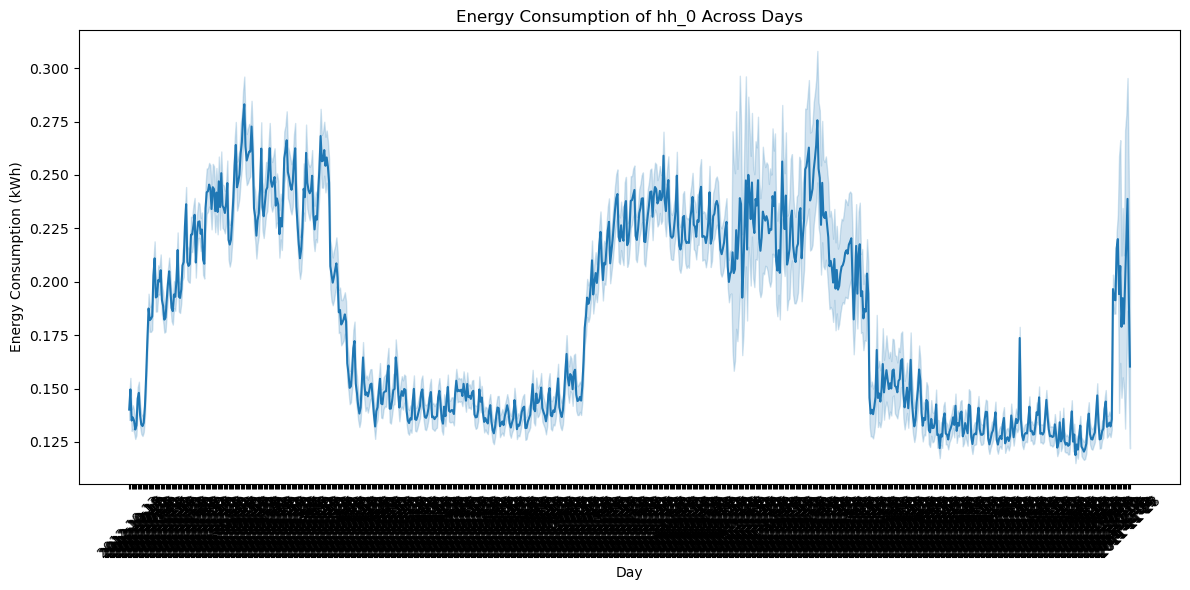

In [44]:
# Plot energy usage for household hh_0 across all days

plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x='day', y='hh_0')
plt.title('Energy Consumption of hh_0 Across Days')
plt.xlabel('Day')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

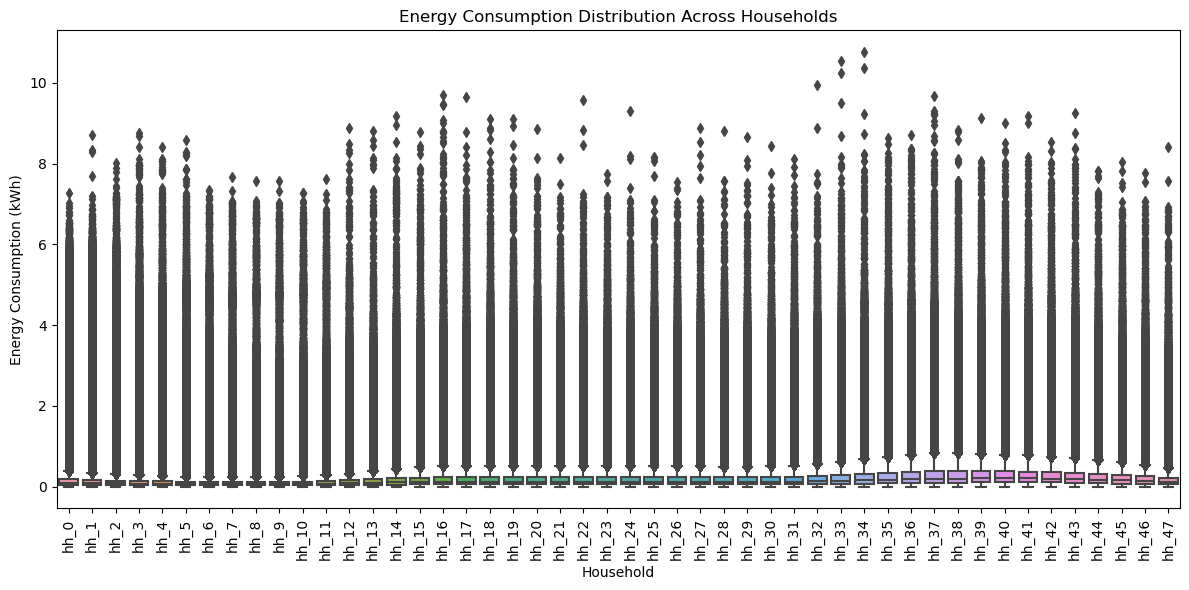

In [45]:
# Plot the distribution of energy consumption for all households

plt.figure(figsize=(12, 6))
sns.boxplot(data=df3.iloc[:, 2:])  # Skip the first two columns (LCLid, day)
plt.title('Energy Consumption Distribution Across Households')
plt.xlabel('Household')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

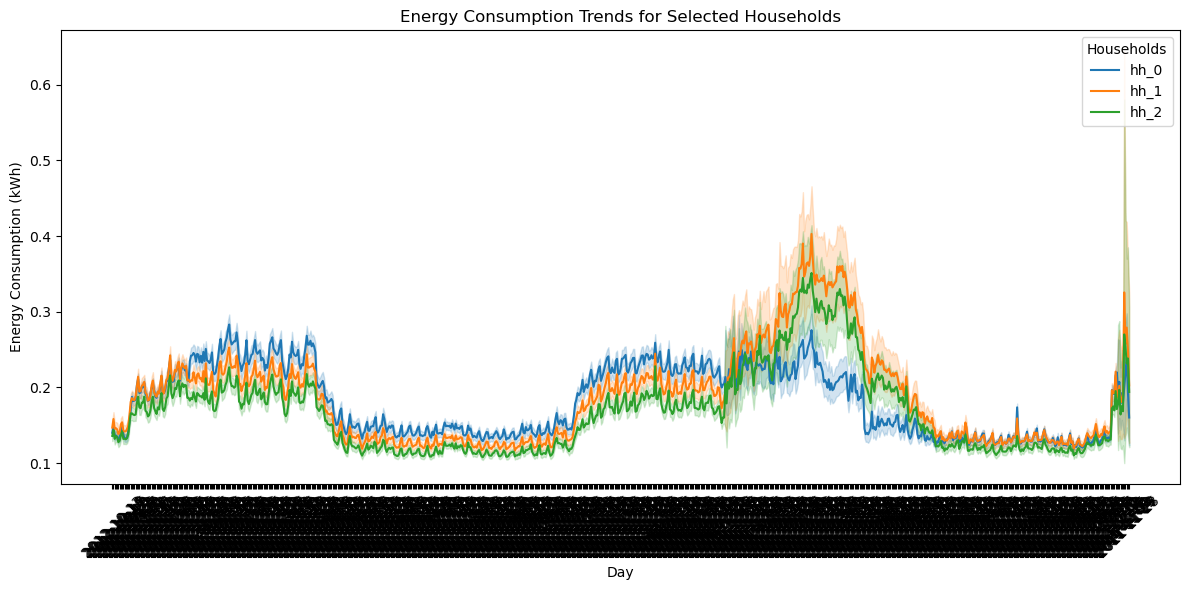

In [48]:
# Plot energy consumption for a few households (e.g., hh_0, hh_1, hh_2) over a selected period

plt.figure(figsize=(12, 6))
sns.lineplot(data=df3[['day', 'hh_0', 'hh_1', 'hh_2']], x='day', y='hh_0', label='hh_0')
sns.lineplot(data=df3[['day', 'hh_0', 'hh_1', 'hh_2']], x='day', y='hh_1', label='hh_1')
sns.lineplot(data=df3[['day', 'hh_0', 'hh_1', 'hh_2']], x='day', y='hh_2', label='hh_2')
plt.title('Energy Consumption Trends for Selected Households')
plt.xlabel('Day')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.legend(title='Households')
plt.tight_layout()
plt.show()

In [ ]:
# # Heatmap of energy consumption for a subset of households over a period of days

# plt.figure(figsize=(12, 8))
# subset = df3[['day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4']].set_index('day').transpose()
# sns.heatmap(subset, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Energy Consumption (kWh)'})
# plt.title('Energy Consumption Heatmap for Households')
# plt.xlabel('Day')
# plt.ylabel('Household')
# plt.tight_layout()
# plt.show()

---

## <div id="4-acorn-details"> 4. Acorn Details </div>
`acorn_details.csv`

In [24]:
# Read data
df4 = pd.read_csv("Data/4. acorn_details.csv", encoding='ISO-8859-1')
df4.head()

MAIN CATEGORIES CATEGORIES  REFERENCE  ACORN-A  ACORN-B  ACORN-C  ACORN-D  \
0      POPULATION        Age    Age 0-4     77.0     83.0     72.0    100.0   
1      POPULATION        Age   Age 5-17    117.0    109.0     87.0     69.0   
2      POPULATION        Age  Age 18-24     64.0     73.0     67.0    107.0   
3      POPULATION        Age  Age 25-34     52.0     63.0     62.0    197.0   
4      POPULATION        Age  Age 35-49    102.0    105.0     91.0    124.0   

   ACORN-E  ACORN-F  ACORN-G  ACORN-H  ACORN-I  ACORN-J  ACORN-K  ACORN-L  \
0    120.0     77.0     97.0     97.0     63.0    119.0     67.0    114.0   
1     94.0     95.0    102.0    106.0     67.0     95.0     64.0    108.0   
2    100.0     71.0     83.0     89.0     62.0    104.0    459.0     97.0   
3    151.0     66.0     90.0     88.0     63.0    132.0    145.0    109.0   
4    118.0     93.0    102.0    103.0     76.0    111.0     67.0     99.0   

   ACORN-M  ACORN-N  ACORN-O  ACORN-P  ACORN-Q  
0    113.0     89.0    123.0    138.0    133.0  
1    116.0     86.0     89.0    136.0    106.0  
2     96.0     86.0    117.0    109.0    110.0  
3     96.0     90.0    140.0    120.0    120.0  
4     98.0     90.0    102.0    103.0    100.0

In [25]:
# Print shape & columns
df4_shape = df4.shape
print(f"The shape of `df4` is: {df4_shape}")

df4_columns = df4.columns
df4_columns_count = len(df4_columns)
print(f"\n`df4` contains {df4_columns_count} columns: \n{df4_columns}")

The shape of `df4` is: (826, 20)

`df4` contains 20 columns: 
Index(['MAIN CATEGORIES', 'CATEGORIES', 'REFERENCE', 'ACORN-A', 'ACORN-B',
       'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F', 'ACORN-G', 'ACORN-H',
       'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L', 'ACORN-M', 'ACORN-N',
       'ACORN-O', 'ACORN-P', 'ACORN-Q'],
      dtype='object')


In [26]:
# Display basic info
print(df4.info())
print(df4.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MAIN CATEGORIES  826 non-null    object 
 1   CATEGORIES       826 non-null    object 
 2   REFERENCE        826 non-null    object 
 3   ACORN-A          826 non-null    float64
 4   ACORN-B          826 non-null    float64
 5   ACORN-C          826 non-null    float64
 6   ACORN-D          826 non-null    float64
 7   ACORN-E          826 non-null    float64
 8   ACORN-F          826 non-null    float64
 9   ACORN-G          826 non-null    float64
 10  ACORN-H          826 non-null    float64
 11  ACORN-I          826 non-null    float64
 12  ACORN-J          826 non-null    float64
 13  ACORN-K          826 non-null    float64
 14  ACORN-L          826 non-null    float64
 15  ACORN-M          826 non-null    float64
 16  ACORN-N          826 non-null    float64
 17  ACORN-O         

In [27]:
# Check missing values
print(df4.isnull().sum())

MAIN CATEGORIES    0
CATEGORIES         0
REFERENCE          0
ACORN-A            0
ACORN-B            0
ACORN-C            0
ACORN-D            0
ACORN-E            0
ACORN-F            0
ACORN-G            0
ACORN-H            0
ACORN-I            0
ACORN-J            0
ACORN-K            0
ACORN-L            0
ACORN-M            0
ACORN-N            0
ACORN-O            0
ACORN-P            0
ACORN-Q            0
dtype: int64


In [29]:
# Group by 'MAIN CATEGORIES' and 'CATEGORIES'
category_summary = df4.groupby(['MAIN CATEGORIES', 'CATEGORIES']).mean()
category_summary

/var/folders/b_/6l6rrpzs5yqd2b5_sl147sq40000gn/T/ipykernel_8885/2129272060.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_summary = df4.groupby(['MAIN CATEGORIES', 'CATEGORIES']).mean()


ACORN-A     ACORN-B  \
MAIN CATEGORIES  CATEGORIES                                                     
COMMUNITY SAFETY Crime Survey for England               91.954545   88.454545   
CONTACT          Preferred Channel                      98.250000  107.500000   
DIGITAL          Digital Attitudes                     103.500000   99.833333   
                 Internet Access: Frequency             75.500000   66.000000   
                 Internet Access: Usage in Last Week    91.600000   95.400000   
...                                                           ...         ...   
SHOPPING         Preferred Supermarket                 151.285714  129.428571   
TRANSPORT        Car Ownership                          96.750000  105.000000   
                 Main Car Class                        238.200000  129.000000   
                 Public Transport Accessibility Level  101.421556   48.333294   
                 Travel To Work                        117.000000   85.875000   

                                                          ACORN-C     ACORN-D  \
MAIN CATEGORIES  CATEGORIES                                                     
COMMUNITY SAFETY Crime Survey for England               90.636364   94.272727   
CONTACT          Preferred Channel                     112.000000   78.000000   
DIGITAL          Digital Attitudes                      96.833333  110.833333   
                 Internet Access: Frequency             82.000000   52.000000   
                 Internet Access: Usage in Last Week    99.600000   90.000000   
...                                                           ...         ...   
SHOPPING         Preferred Supermarket                 115.285714  146.000000   
TRANSPORT        Car Ownership                          97.500000  110.750000   
                 Main Car Class                        121.200000  100.000000   
                 Public Transport Accessibility Level   46.928054  505.119749   
                 Travel To Work                         84.125000  171.875000   

                                                          ACORN-E     ACORN-F  \
MAIN CATEGORIES  CATEGORIES                                                     
COMMUNITY SAFETY Crime Survey for England               91.590909   90.272727   
CONTACT          Preferred Channel                      78.500000  130.250000   
DIGITAL          Digital Attitudes                     109.166667   95.333333   
                 Internet Access: Frequency             61.500000   83.750000   
                 Internet Access: Usage in Last Week    94.200000   99.800000   
...                                                           ...         ...   
SHOPPING         Preferred Supermarket                 118.000000  106.571429   
TRANSPORT        Car Ownership                         101.250000  100.750000   
                 Main Car Class                        106.200000  101.000000   
                 Public Transport Accessibility Level  146.255612   35.091728   
                 Travel To Work                        106.250000   81.750000   

                                                          ACORN-G     ACORN-H  \
MAIN CATEGORIES  CATEGORIES                                                     
COMMUNITY SAFETY Crime Survey for England               99.909091  102.318182   
CONTACT          Preferred Channel                      87.750000   94.750000   
DIGITAL          Digital Attitudes                      98.000000  100.000000   
                 Internet Access: Frequency             81.750000   88.500000   
                 Internet Access: Usage in Last Week    99.000000   99.800000   
...                                                           ...         ...   
SHOPPING         Preferred Supermarket                 108.285714  102.285714   
TRANSPORT        Car Ownership                          93.250000   90.000000   
                 Main Car Class                        102.800000  101.400000   
     

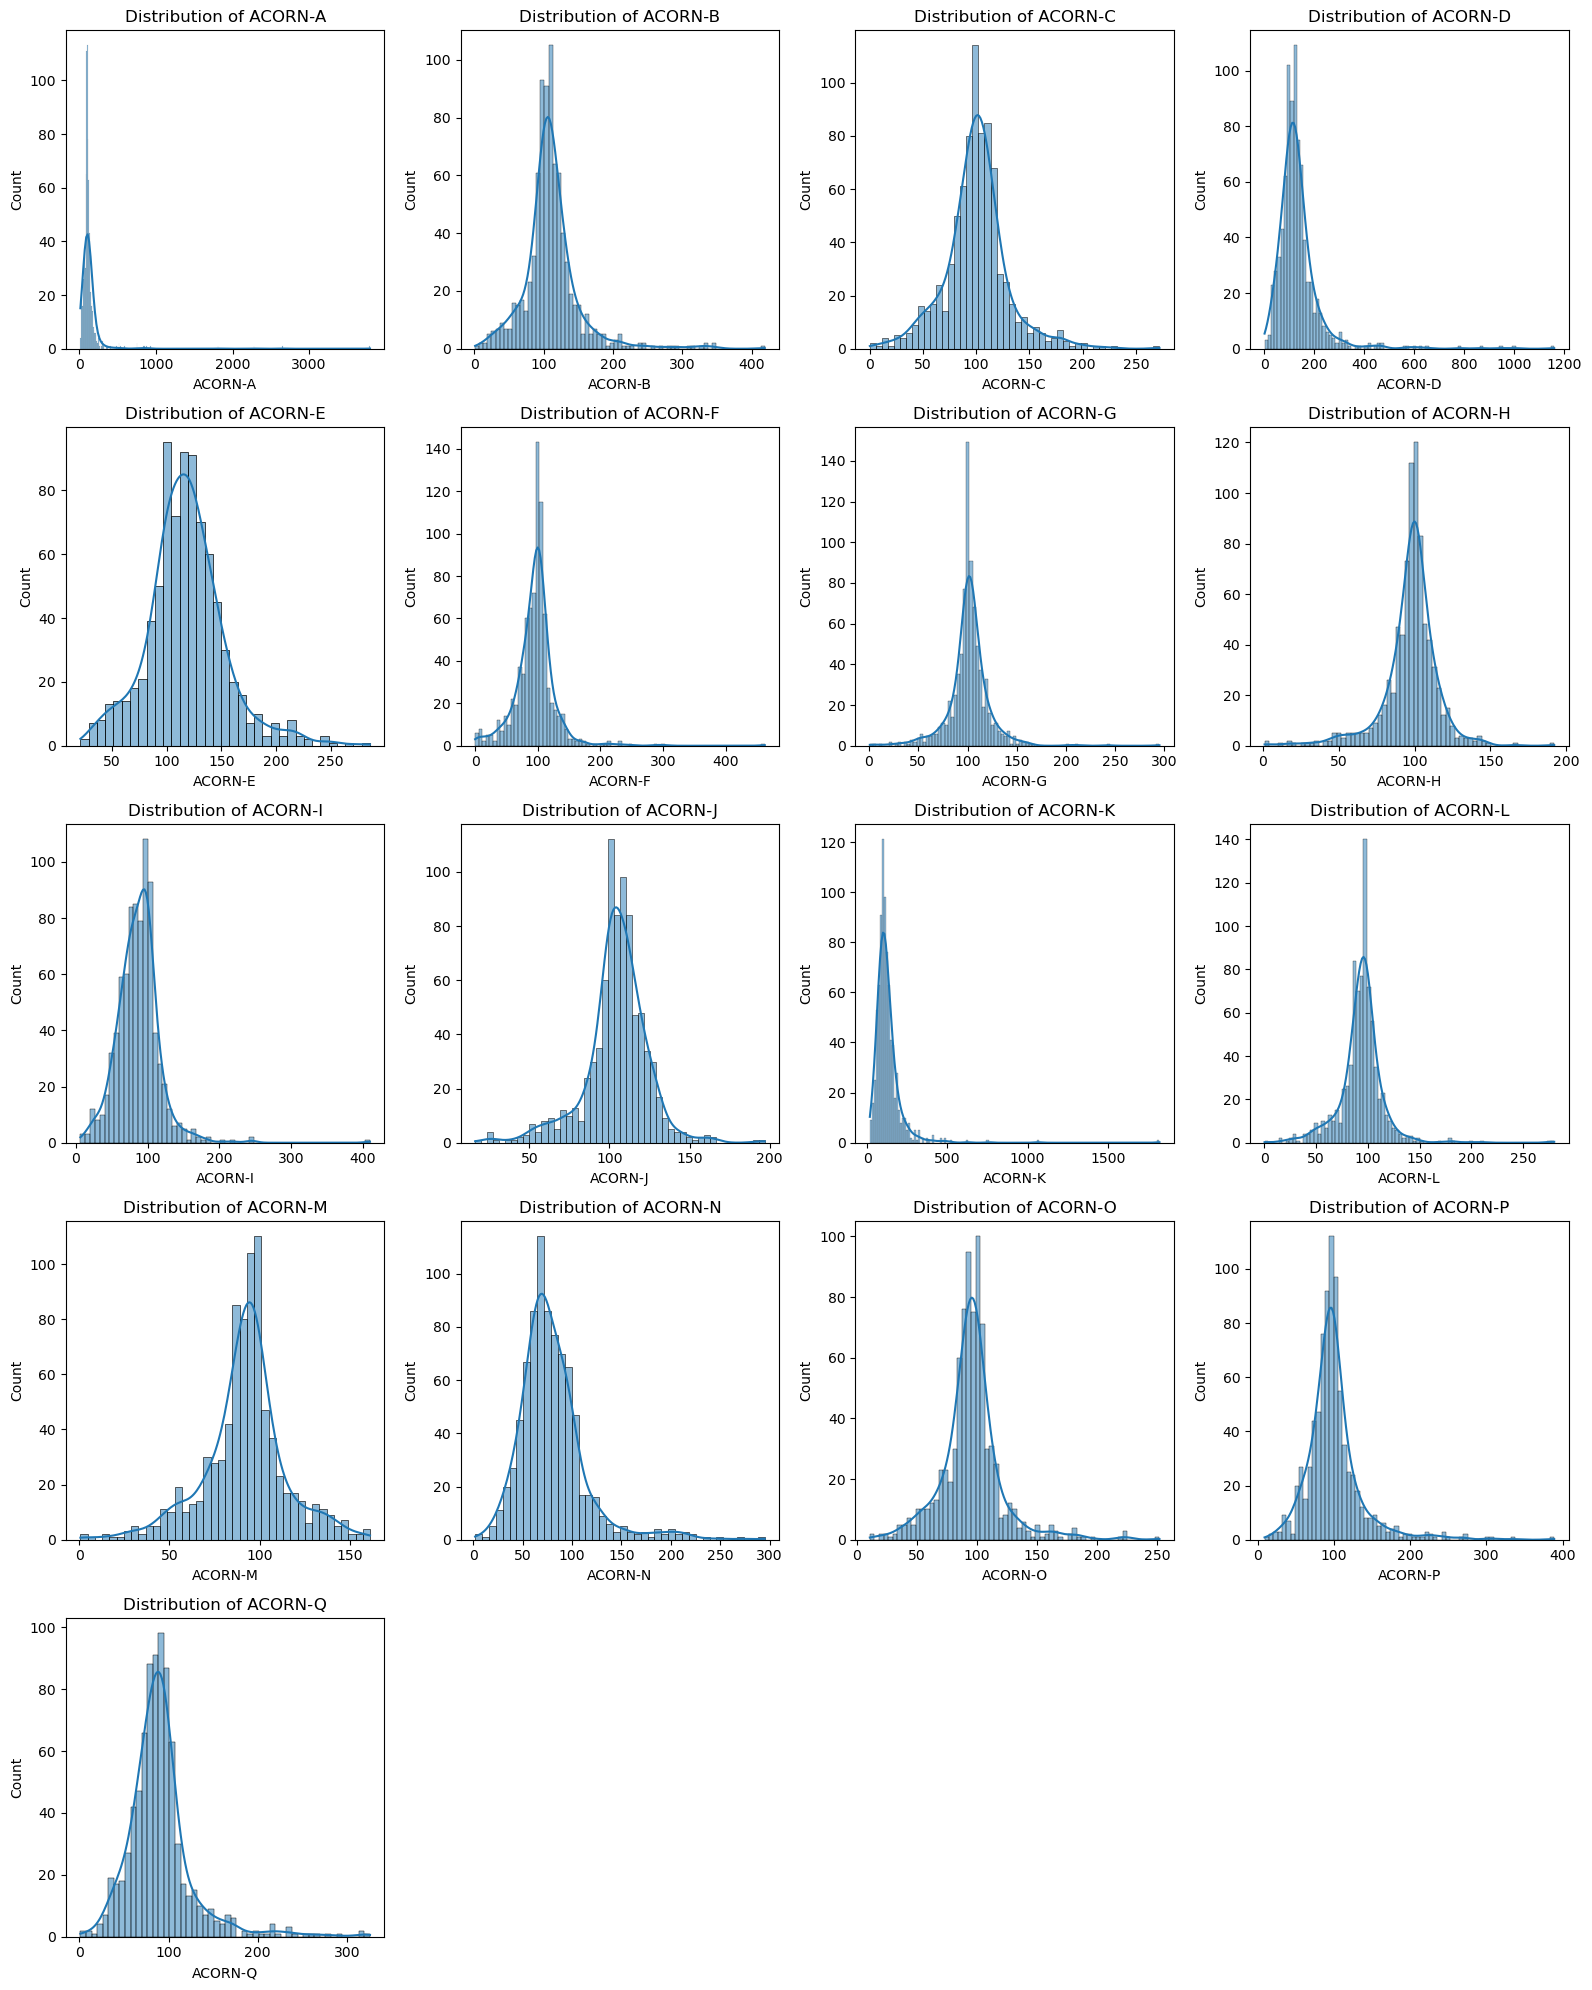

In [35]:
# Distribution of ACORN Categories

acorn_columns = [col for col in df4.columns if 'ACORN' in col]

# Get the number of rows and columns for the subplots
num_cols = 4  # You can adjust this based on your preference
num_rows = math.ceil(len(acorn_columns) / num_cols)

# Create the figure and subplots dynamically
plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, col in enumerate(acorn_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each ACORN category
    sns.histplot(df4[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

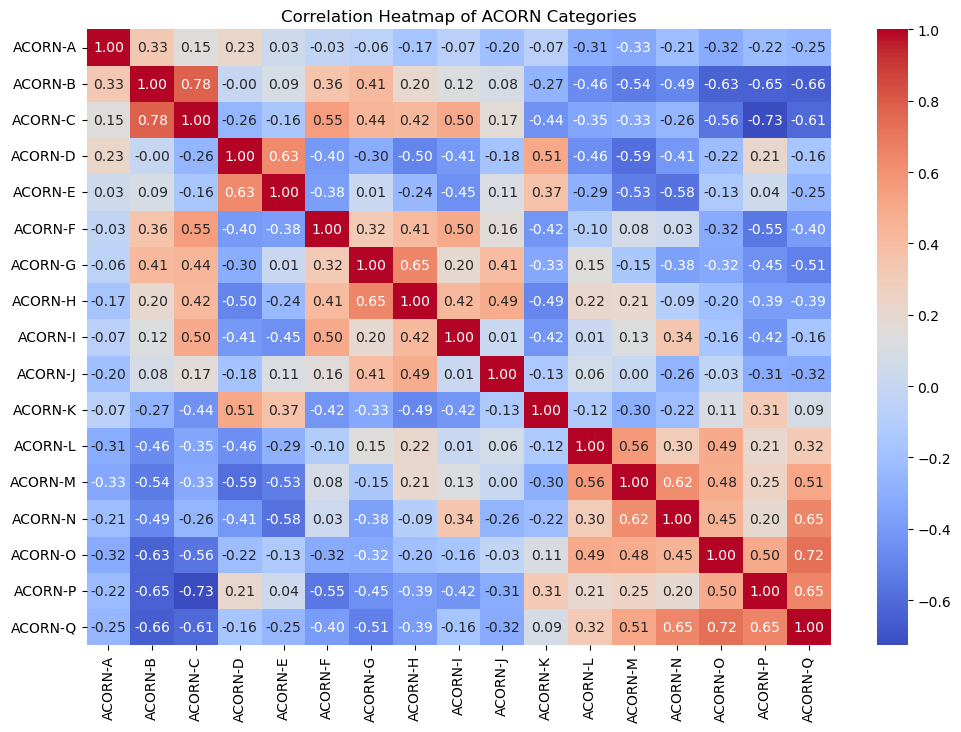

In [ ]:
# Heatmap of the ACORN Categories

acorn_data = df4[acorn_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(acorn_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of ACORN Categories')
plt.show()

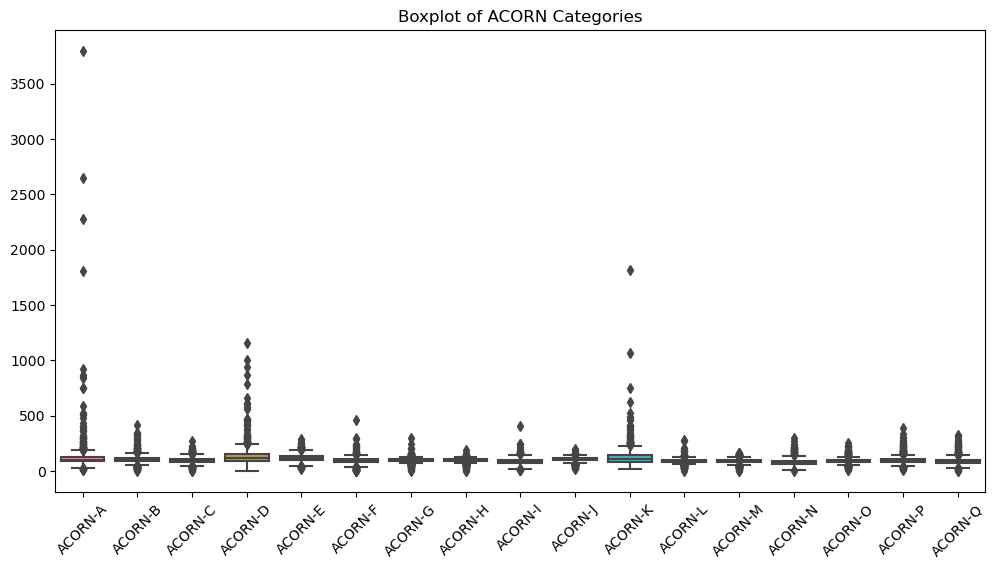

In [39]:
# Boxplot of ACORN Categories by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df4[acorn_columns])
plt.title('Boxplot of ACORN Categories')
plt.xticks(rotation=45)
plt.show()

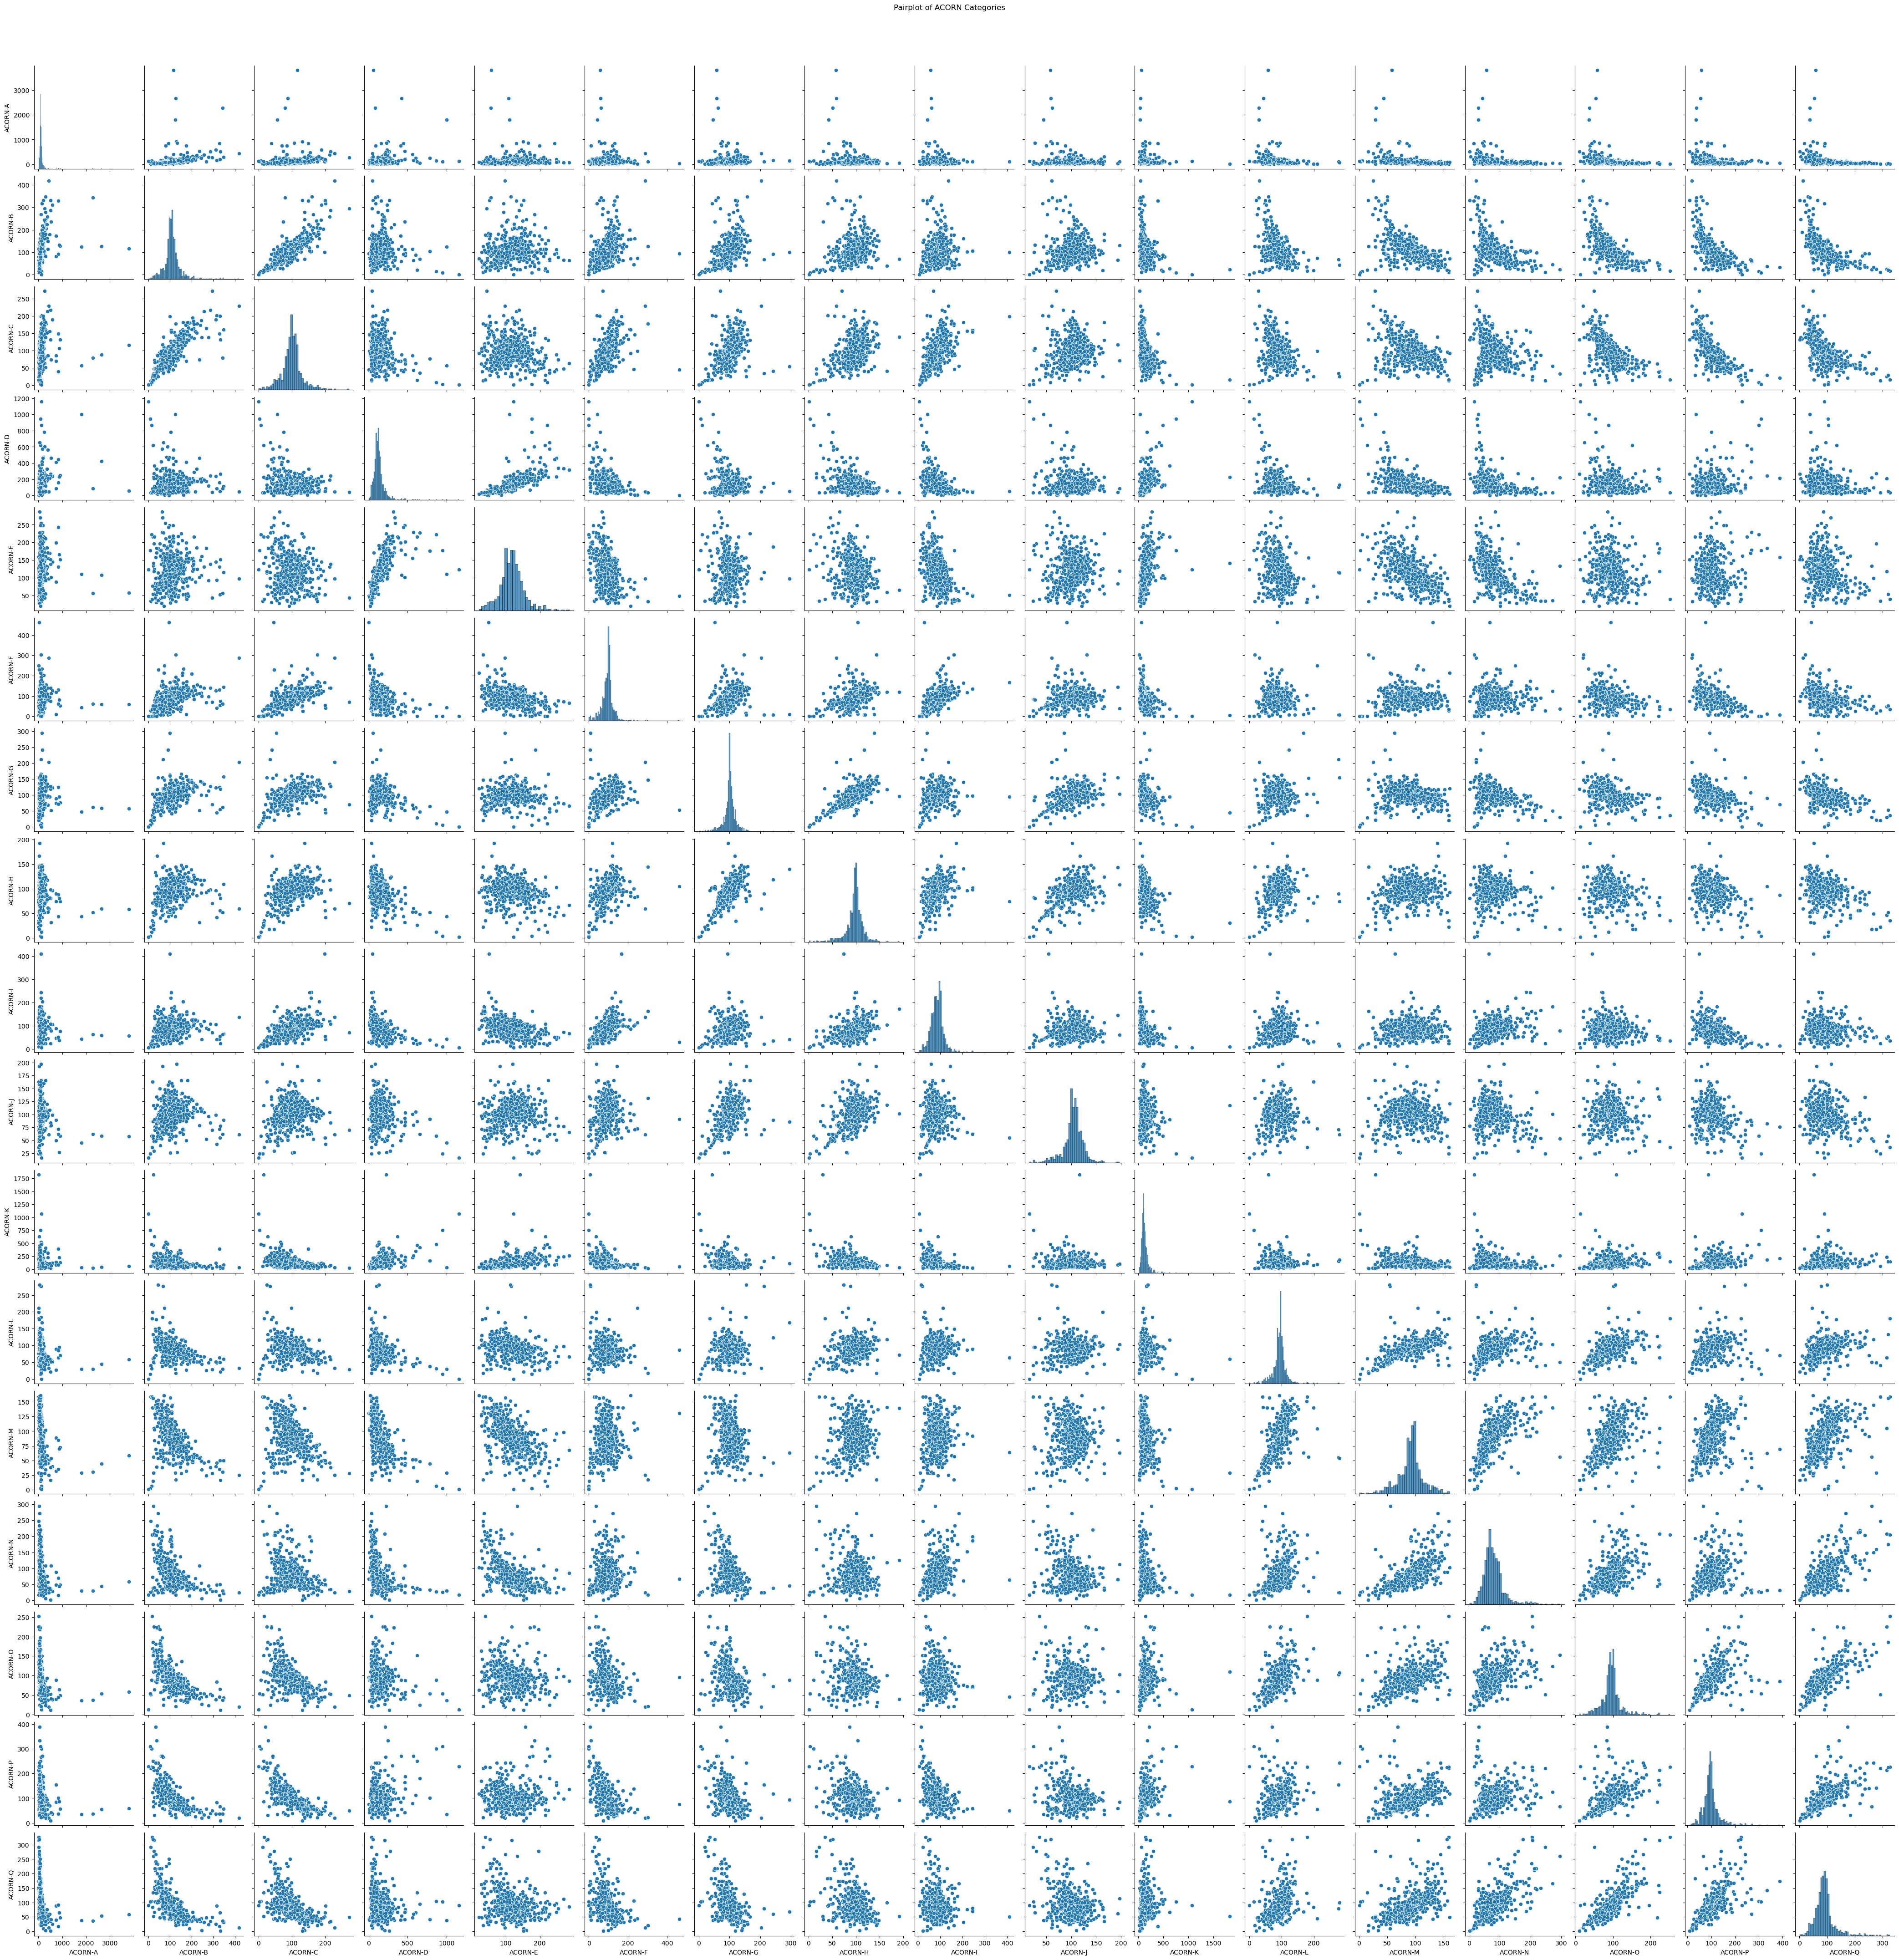

In [40]:
# Pairplot of Select ACORN Categories
sns.pairplot(df4[acorn_columns])
plt.suptitle('Pairplot of ACORN Categories', y=1.02)
plt.show()

---

## <div id="5-daily-dataset"> 5. Daily Dataset </div>
`daily_dataset.csv`

In [4]:
# Read data
df5 = pd.read_csv("Data/5. daily_dataset.csv")
df5.head()

LCLid         day  energy_median  energy_mean  energy_max  \
0  MAC000131  2011-12-15         0.4850     0.432045       0.868   
1  MAC000131  2011-12-16         0.1415     0.296167       1.116   
2  MAC000131  2011-12-17         0.1015     0.189812       0.685   
3  MAC000131  2011-12-18         0.1140     0.218979       0.676   
4  MAC000131  2011-12-19         0.1910     0.325979       0.788   

   energy_count  energy_std  energy_sum  energy_min  
0            22    0.239146       9.505       0.072  
1            48    0.281471      14.216       0.031  
2            48    0.188405       9.111       0.064  
3            48    0.202919      10.511       0.065  
4            48    0.259205      15.647       0.066

In [42]:
# Print shape & columns
df5_shape = df5.shape
print(f"The shape of `df5` is: {df5_shape}")

df5_columns = df5.columns
df5_columns_count = len(df5_columns)
print(f"\n`df5` contains {df5_columns_count} columns: \n{df5_columns}")

The shape of `df5` is: (3510433, 9)

`df5` contains 9 columns: 
Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')


In [46]:
# Display basic info
print(df5.info())
print(df5.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB
None
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   3.510403e+06  3.510403e+06  3.510403e+06  3.510433e+06  3.499102e+06   
mean    1.587395e-01  2.117305e-01  8.345210e-01  4.780364e+01  1.726673e-01   
std     1.701865e-01  1.908460e-01  6.683156e-01  2.810982e+00  1.531208e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6.700000e-02  9.808333e-02  3.460000e-01  4.800000e+01  6.911626e-02   
50%     1.145000e-01  1.632917e

In [47]:
# Check missing values
print(df5.isnull().sum())

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64


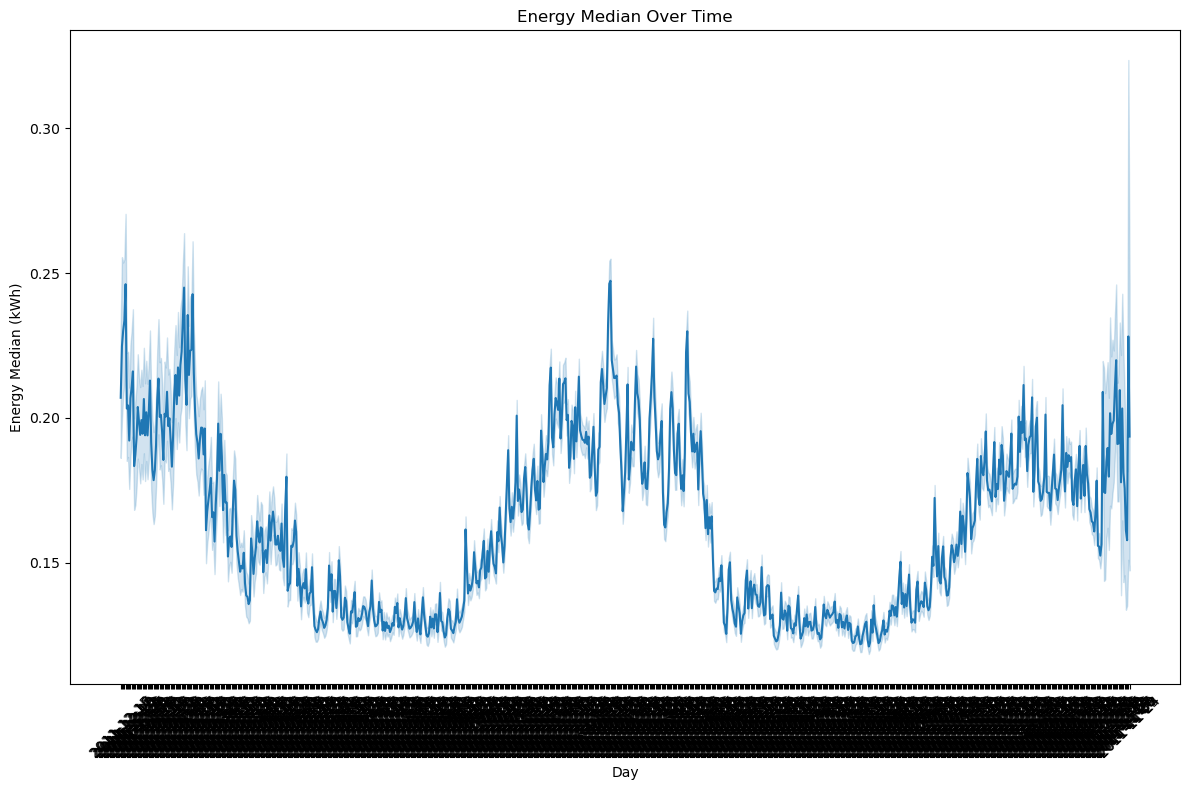

In [5]:
# Plot energy_median over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_median')
plt.title('Energy Median Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Median (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

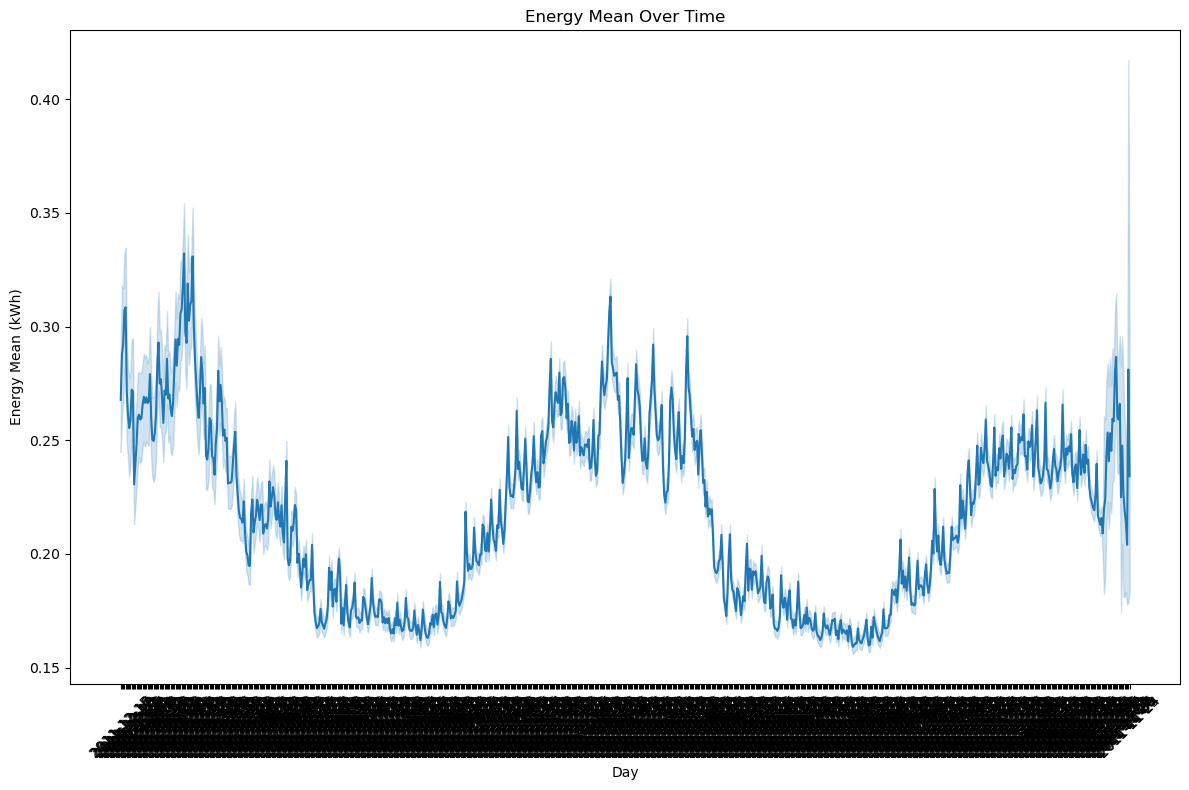

In [6]:
# Plot energy_mean over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_mean')
plt.title('Energy Mean Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Mean (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

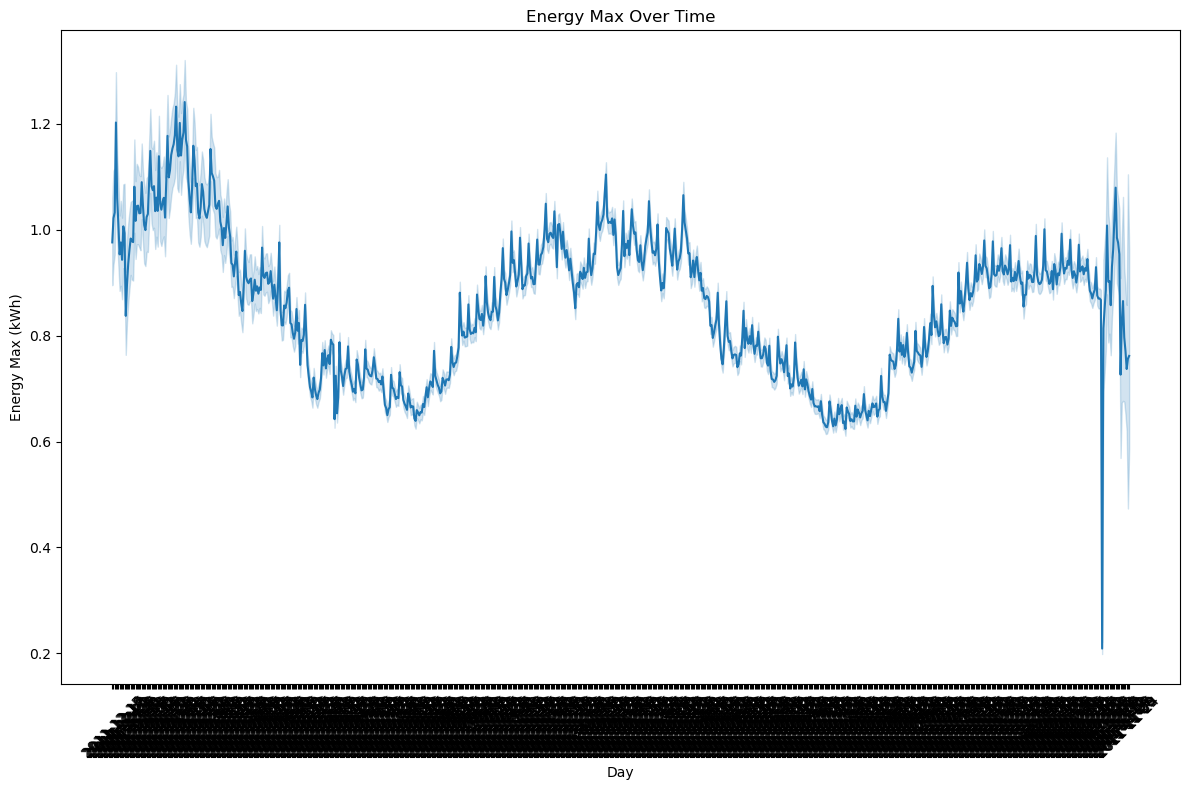

In [7]:
# Plot energy_max over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_max')
plt.title('Energy Max Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Max (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

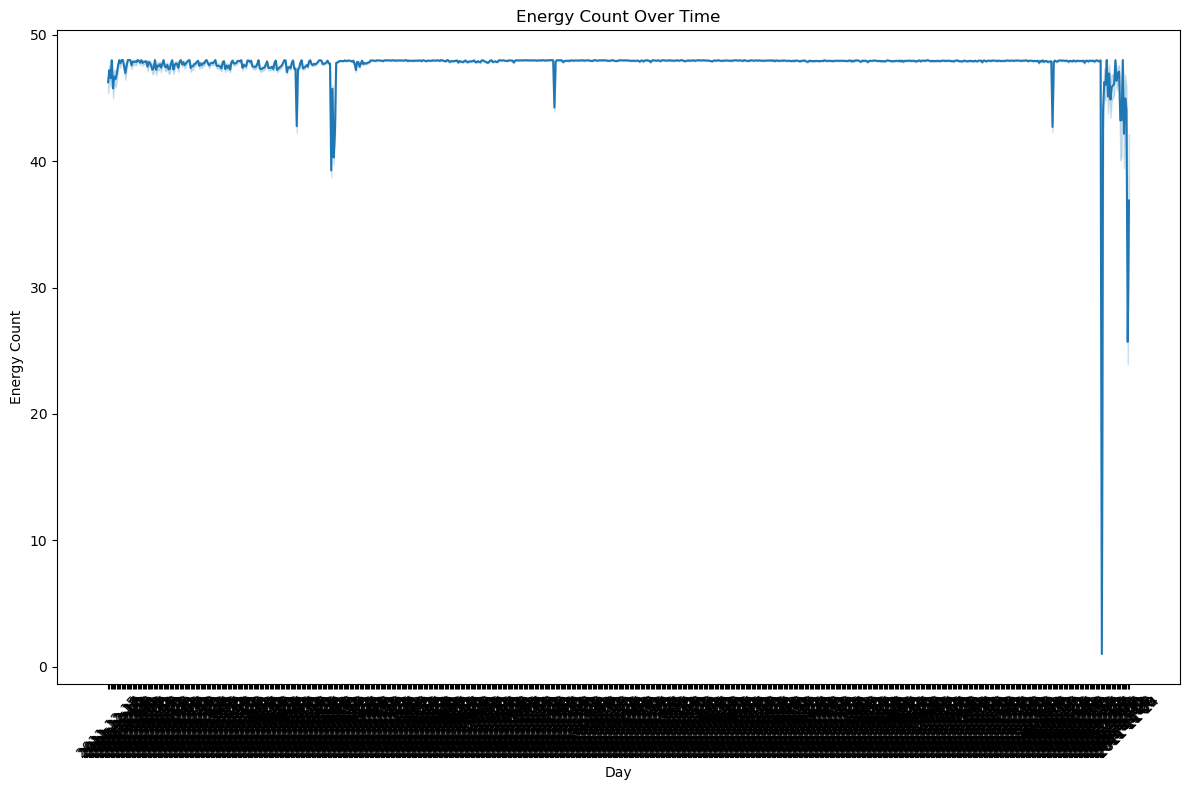

In [8]:
# Plot energy_count over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_count')
plt.title('Energy Count Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

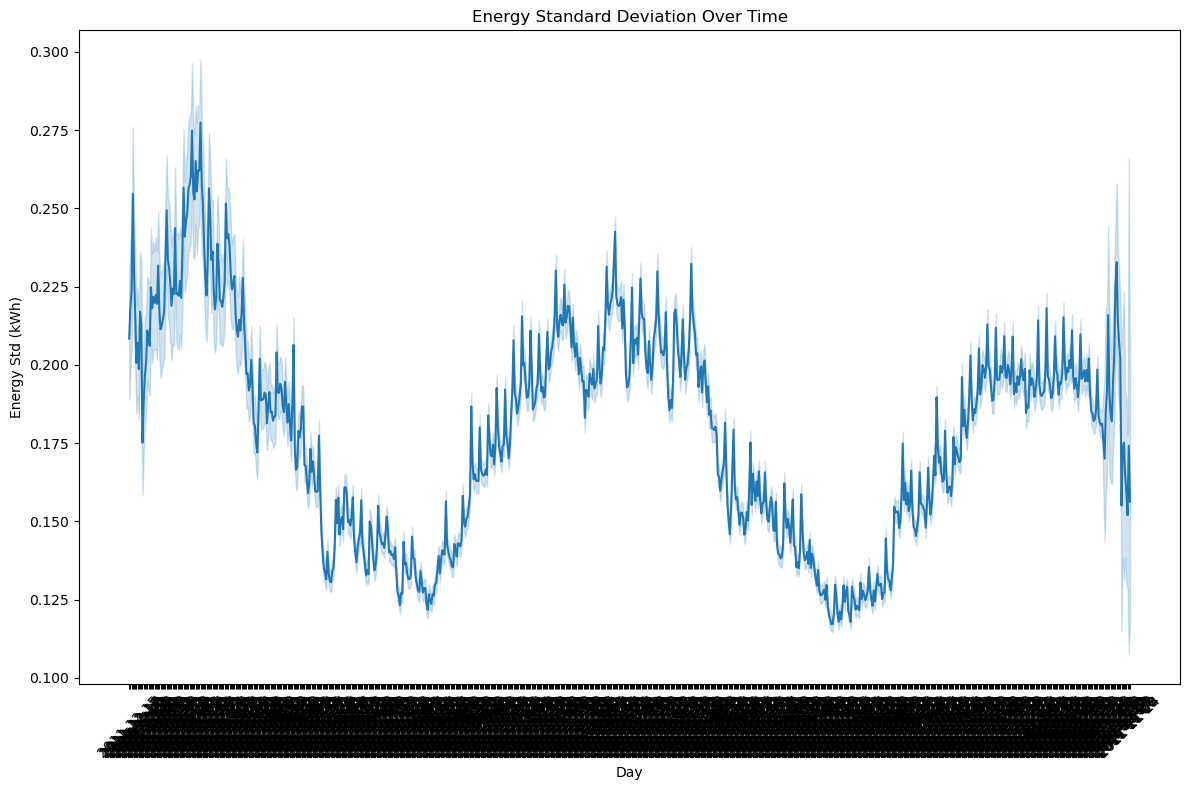

In [9]:
# Plot energy_std over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_std')
plt.title('Energy Standard Deviation Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Std (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

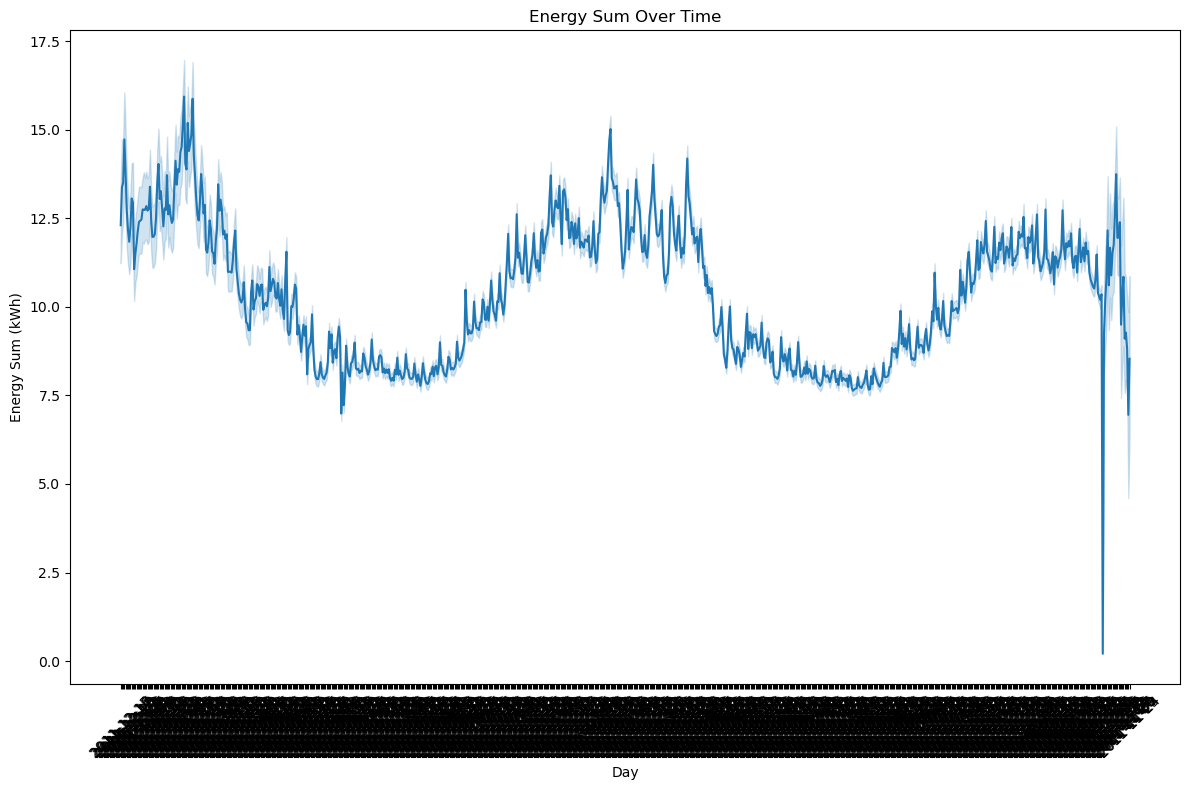

In [10]:
# Plot energy_sum over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_sum')
plt.title('Energy Sum Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Sum (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

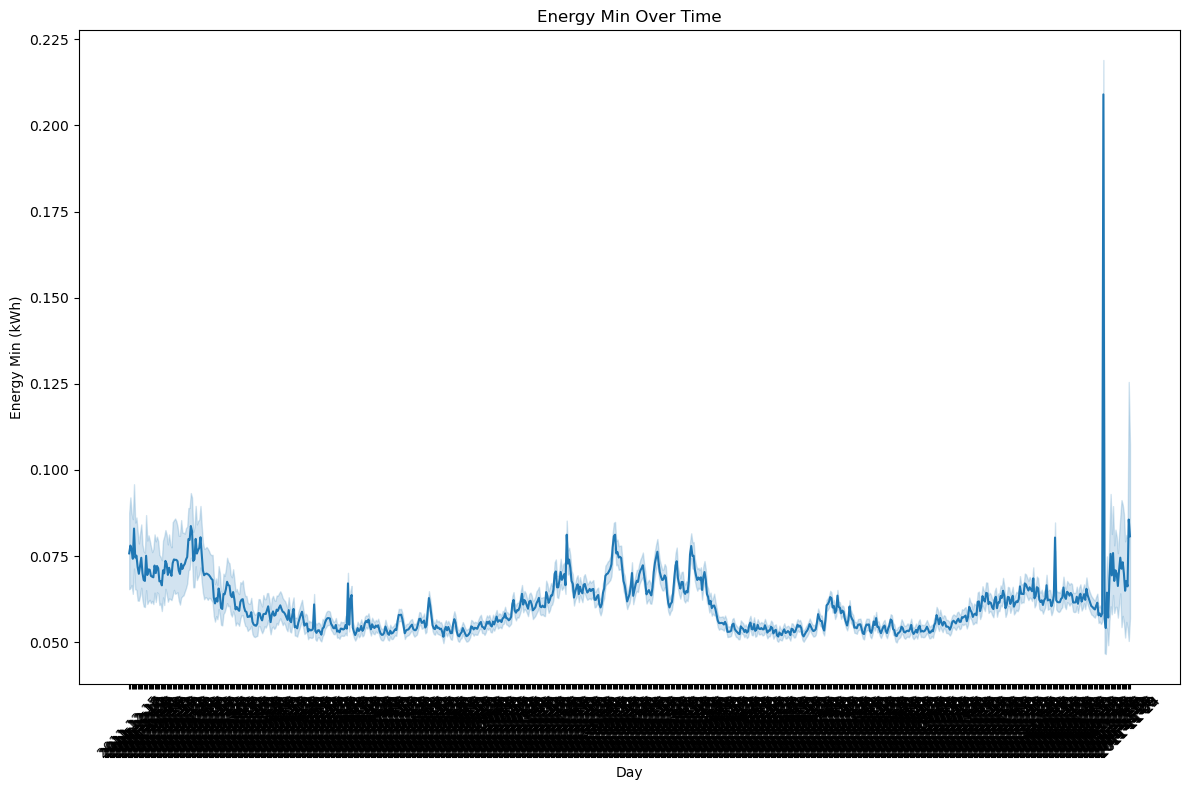

In [11]:
# Plot energy_min over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df5, x='day', y='energy_min')
plt.title('Energy Min Over Time')
plt.xlabel('Day')
plt.ylabel('Energy Min (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

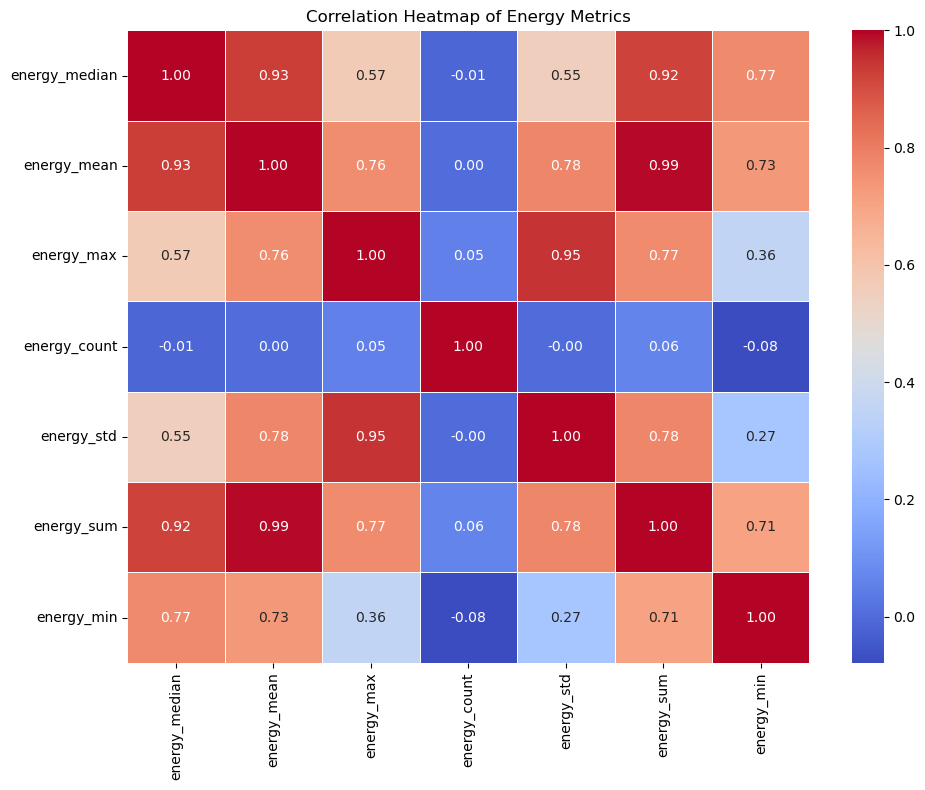

In [12]:
# Correlation heatmap of energy metrics
correlation_matrix = df5[['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Energy Metrics')
plt.tight_layout()
plt.show()

---

## <div id="6-informations-households"> 6. Informations Households </div>
`informations_households.csv`

In [14]:
# Read data
df6 = pd.read_csv("Data/6. informations_households.csv")
df6.head()

LCLid stdorToU    Acorn Acorn_grouped     file
0  MAC005492      ToU   ACORN-        ACORN-  block_0
1  MAC001074      ToU   ACORN-        ACORN-  block_0
2  MAC000002      Std  ACORN-A      Affluent  block_0
3  MAC003613      Std  ACORN-A      Affluent  block_0
4  MAC003597      Std  ACORN-A      Affluent  block_0

In [15]:
# Print shape & columns
df6_shape = df6.shape
print(f"The shape of `df6` is: {df6_shape}")

df6_columns = df6.columns
df6_columns_count = len(df6_columns)
print(f"\n`df6` contains {df6_columns_count} columns: \n{df6_columns}")

The shape of `df6` is: (5566, 5)

`df6` contains 5 columns: 
Index(['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file'], dtype='object')


In [16]:
# Display basic info
print(df6.info())
print(df6.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None
            LCLid stdorToU    Acorn Acorn_grouped     file
count        5566     5566     5566          5566     5566
unique       5566        2       19             5      112
top     MAC005492      Std  ACORN-E      Affluent  block_0
freq            1     4443     1567          2192       50


In [17]:
# Check missing values
print(df6.isnull().sum())

LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64


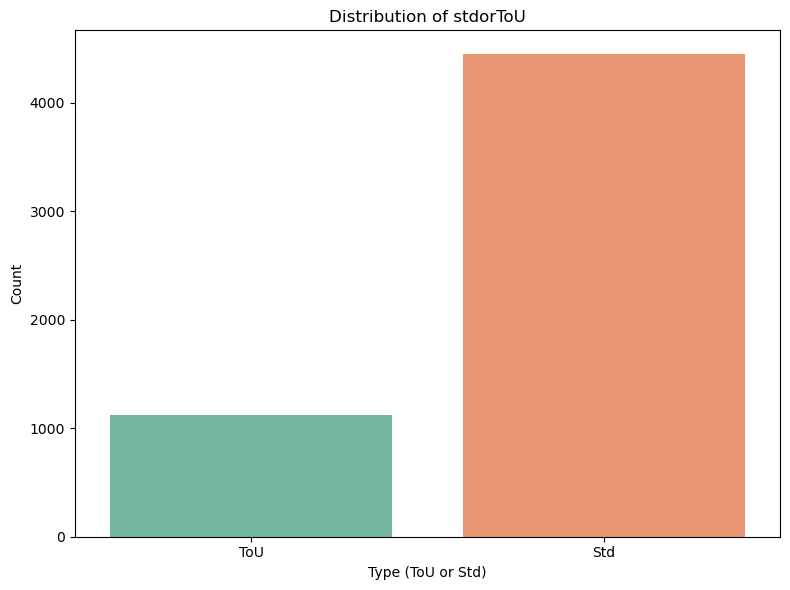

In [18]:
# Plot distribution of 'stdorToU'
plt.figure(figsize=(8, 6))
sns.countplot(x='stdorToU', data=df6, palette='Set2')
plt.title('Distribution of stdorToU')
plt.xlabel('Type (ToU or Std)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

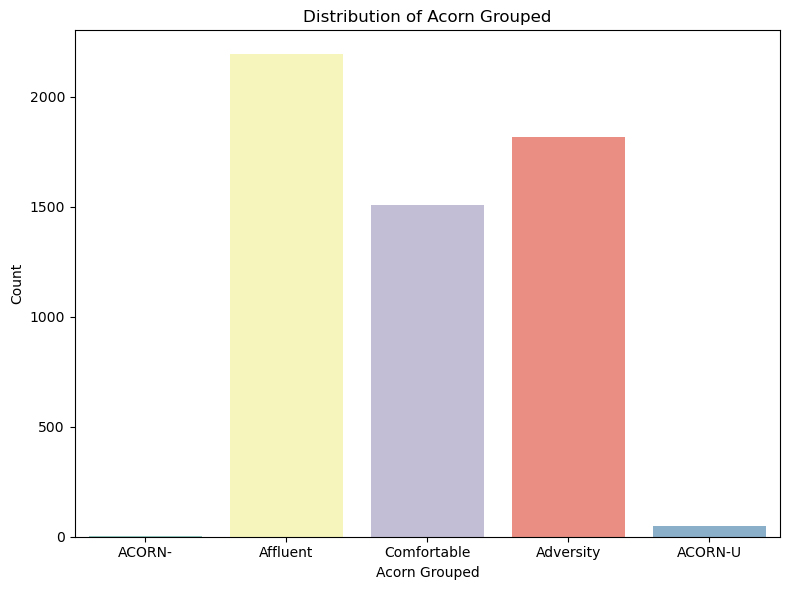

In [19]:
# Plot distribution of 'Acorn_grouped'
plt.figure(figsize=(8, 6))
sns.countplot(x='Acorn_grouped', data=df6, palette='Set3')
plt.title('Distribution of Acorn Grouped')
plt.xlabel('Acorn Grouped')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

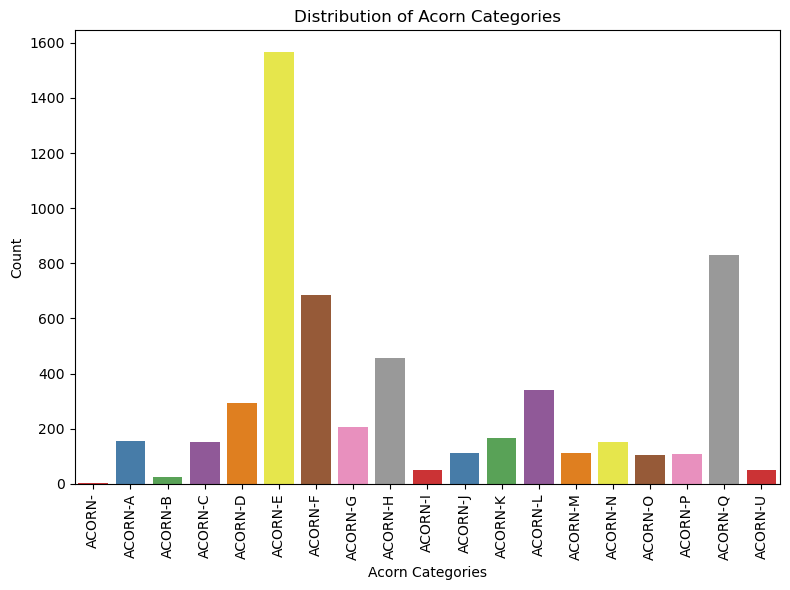

In [24]:
# Plot distribution of 'Acorn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Acorn', data=df6, palette='Set1')
plt.title('Distribution of Acorn Categories')
plt.xlabel('Acorn Categories')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

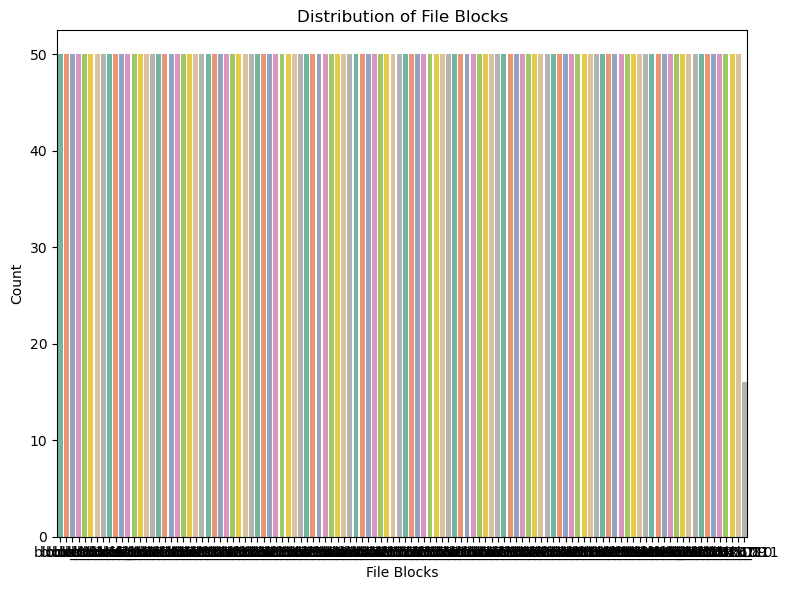

In [21]:
# Plot distribution of 'file'
plt.figure(figsize=(8, 6))
sns.countplot(x='file', data=df6, palette='Set2')
plt.title('Distribution of File Blocks')
plt.xlabel('File Blocks')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

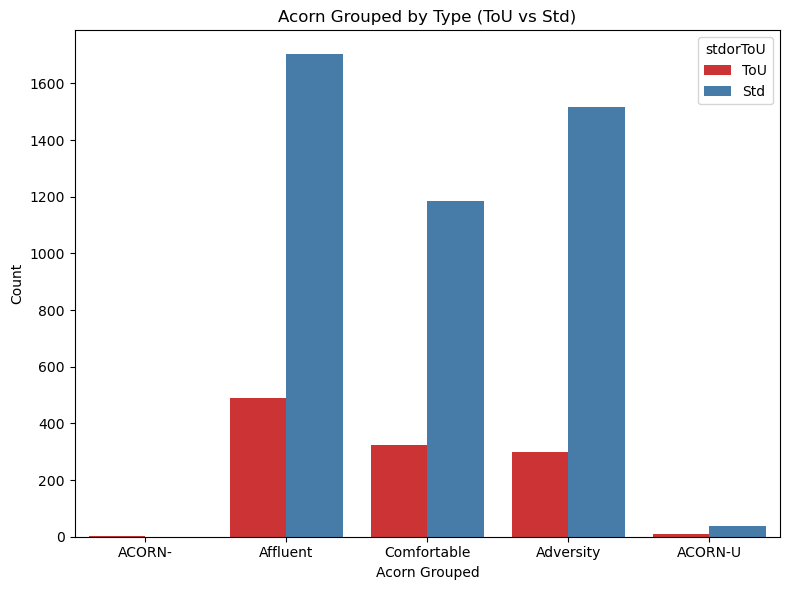

In [22]:
# Group-by Analysis (e.g., count by 'Acorn_grouped' and 'stdorToU')
plt.figure(figsize=(8, 6))
sns.countplot(x='Acorn_grouped', hue='stdorToU', data=df6, palette='Set1')
plt.title('Acorn Grouped by Type (ToU vs Std)')
plt.xlabel('Acorn Grouped')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

---

## <div id="7-uk-bank-holidays">  7. UK Bank Holidays </div>
`uk_bank_holidays.csv`

In [25]:
# Read data
df7 = pd.read_csv("Data/7. uk_bank_holidays.csv")
df7.head()

Bank holidays                                          Type
0    2012-12-26                                    Boxing Day
1    2012-12-25                                 Christmas Day
2    2012-08-27                           Summer bank holiday
3    2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4    2012-04-06          Spring bank holiday (substitute day)

In [26]:
# Print shape & columns
df7_shape = df7.shape
print(f"The shape of `df7` is: {df7_shape}")

df7_columns = df7.columns
df7_columns_count = len(df7_columns)
print(f"\n`df7` contains {df7_columns_count} columns: \n{df7_columns}")

The shape of `df7` is: (25, 2)

`df7` contains 2 columns: 
Index(['Bank holidays', 'Type'], dtype='object')


In [27]:
# Display basic info
print(df7.info())
print(df7.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bank holidays  25 non-null     object
 1   Type           25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes
None
       Bank holidays        Type
count             25          25
unique            25          11
top       2012-12-26  Boxing Day
freq               1           3


In [28]:
# Check missing values
print(df7.isnull().sum())

Bank holidays    0
Type             0
dtype: int64


In [29]:
# Display the unique types of holidays
df7['Type'].unique()

array(['Boxing Day', 'Christmas Day', 'Summer bank holiday',
       'Queen?s Diamond Jubilee (extra bank holiday)',
       'Spring bank holiday (substitute day)', 'Early May bank holiday',
       'Easter Monday', 'Good Friday', 'New Year?s Day (substitute day)',
       'Spring bank holiday', 'New Year?s Day'], dtype=object)

In [30]:
# Count the occurrences of each holiday type
df7['Type'].value_counts()

Boxing Day                                      3
Christmas Day                                   3
Summer bank holiday                             3
Early May bank holiday                          3
Easter Monday                                   3
Good Friday                                     3
Spring bank holiday                             2
New Year?s Day                                  2
Queen?s Diamond Jubilee (extra bank holiday)    1
Spring bank holiday (substitute day)            1
New Year?s Day (substitute day)                 1
Name: Type, dtype: int64

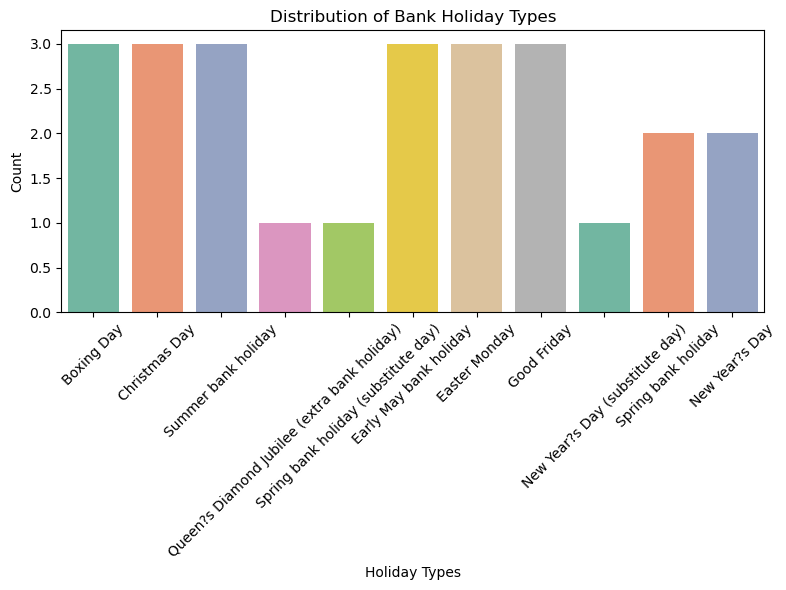

In [31]:
# Plot the distribution of holidays by type
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df7, palette='Set2')
plt.title('Distribution of Bank Holiday Types')
plt.xlabel('Holiday Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

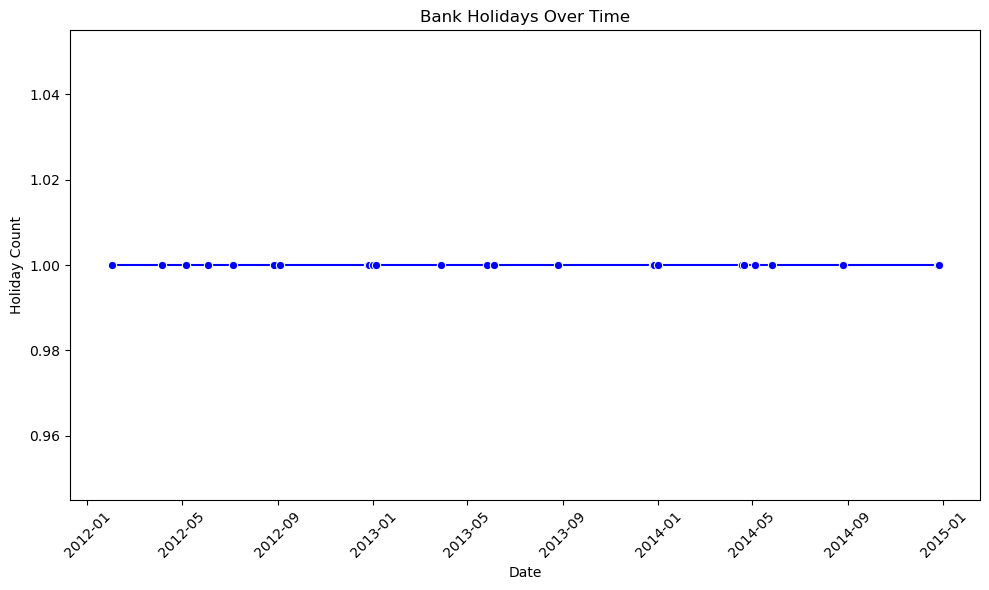

In [35]:
# Group by 'Bank holidays' and count occurrences of each date
holiday_counts = df7.groupby('Bank holidays').size()

# Plot a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=holiday_counts.index, y=holiday_counts.values, marker='o', color='b')
plt.title('Bank Holidays Over Time')
plt.xlabel('Date')
plt.ylabel('Holiday Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## <div id="#8-weather-daily-darksky">  8. Weather Daily Darksky </div>
`weather_daily_darksky.csv`

In [36]:
# Read data
df8 = pd.read_csv("Data/8. weather_daily_darksky.csv")
df8.head()

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

In [37]:
# Print shape & columns
df8_shape = df8.shape
print(f"The shape of `df8` is: {df8_shape}")

df8_columns = df8.columns
df8_columns_count = len(df8_columns)
print(f"\n`df8` contains {df8_columns_count} columns: \n{df8_columns}")

The shape of `df8` is: (882, 32)

`df8` contains 32 columns: 
Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')


In [38]:
# Display basic info
print(df8.info())
print(df8.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [39]:
# Check missing values
print(df8.isnull().sum())

temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentTemperatureMaxTime     0
apparentTe

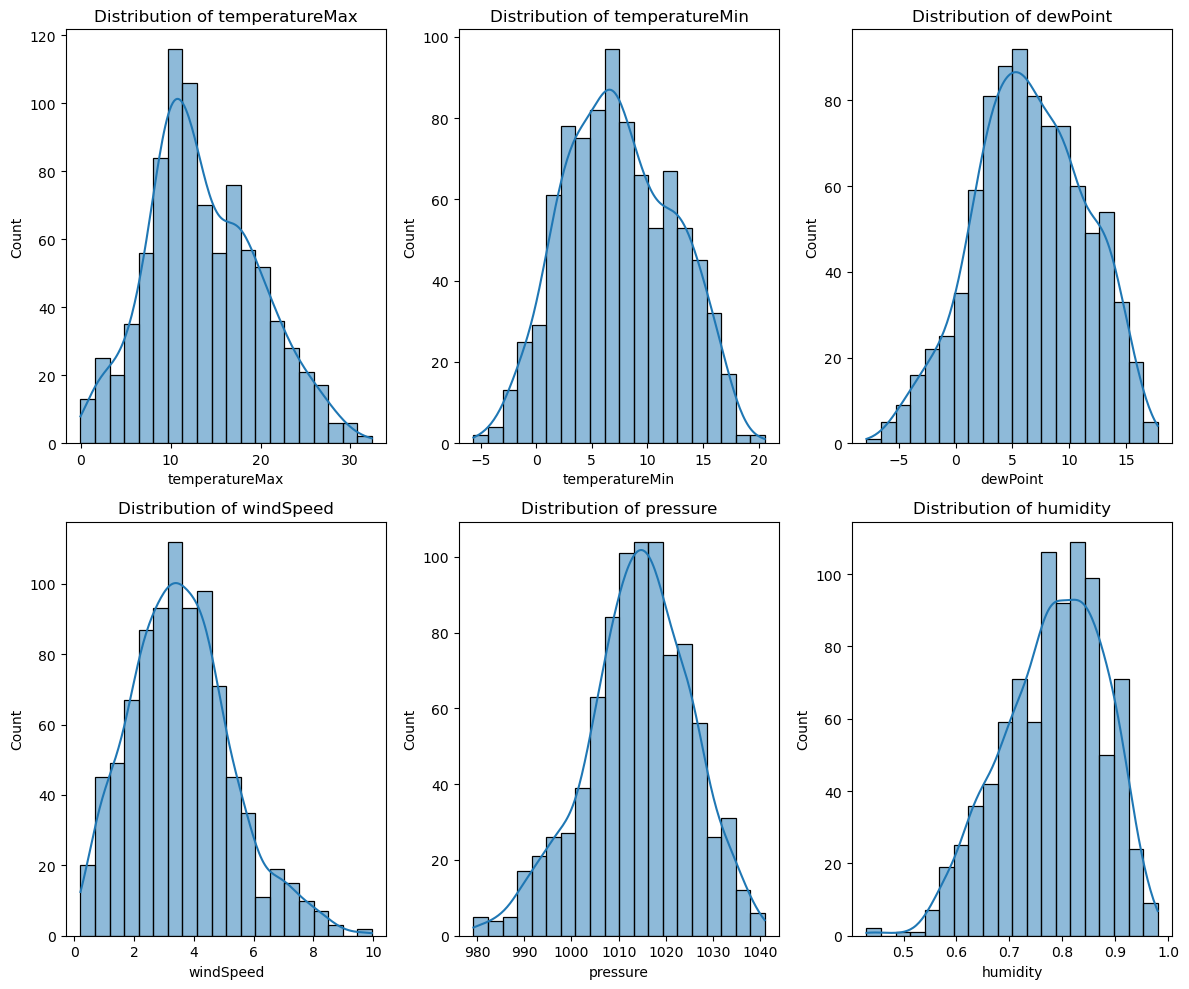

In [40]:
# Histograms for key columns

numerical_columns = ['temperatureMax', 'temperatureMin', 'dewPoint', 'windSpeed', 'pressure', 'humidity']
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df8[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

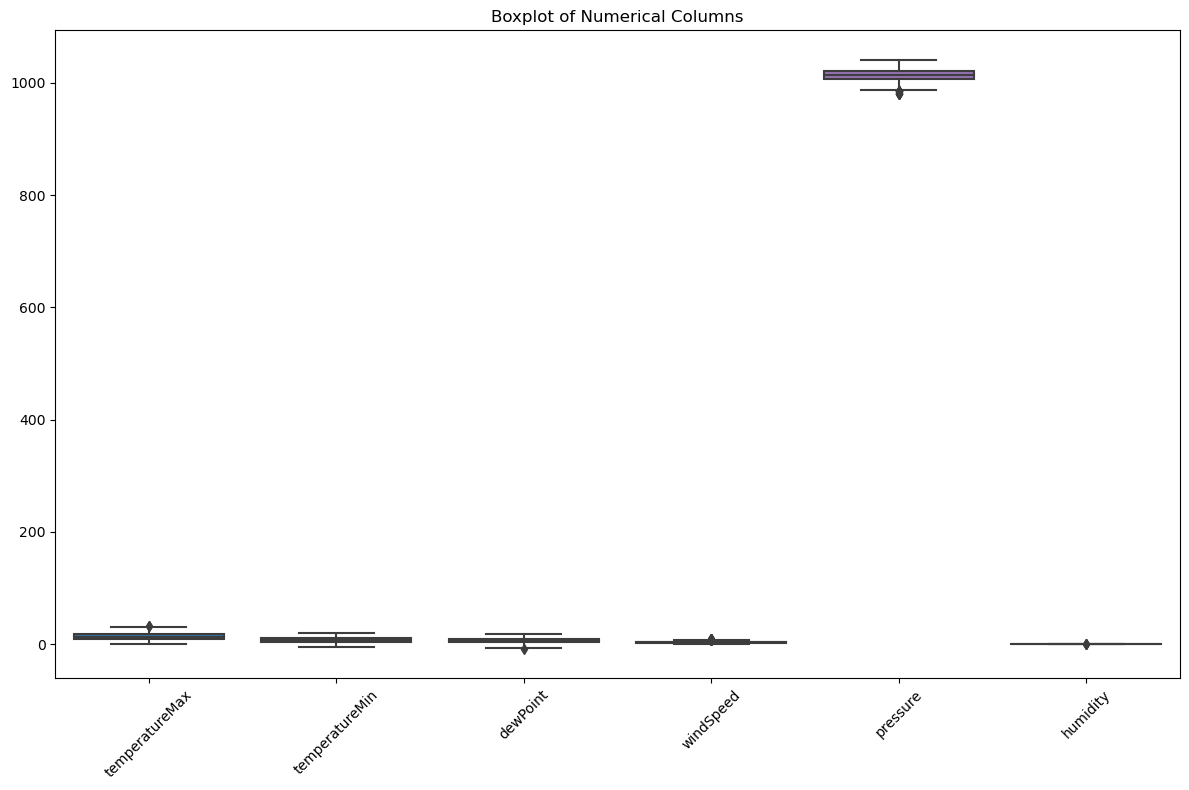

In [42]:
# Boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df8[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

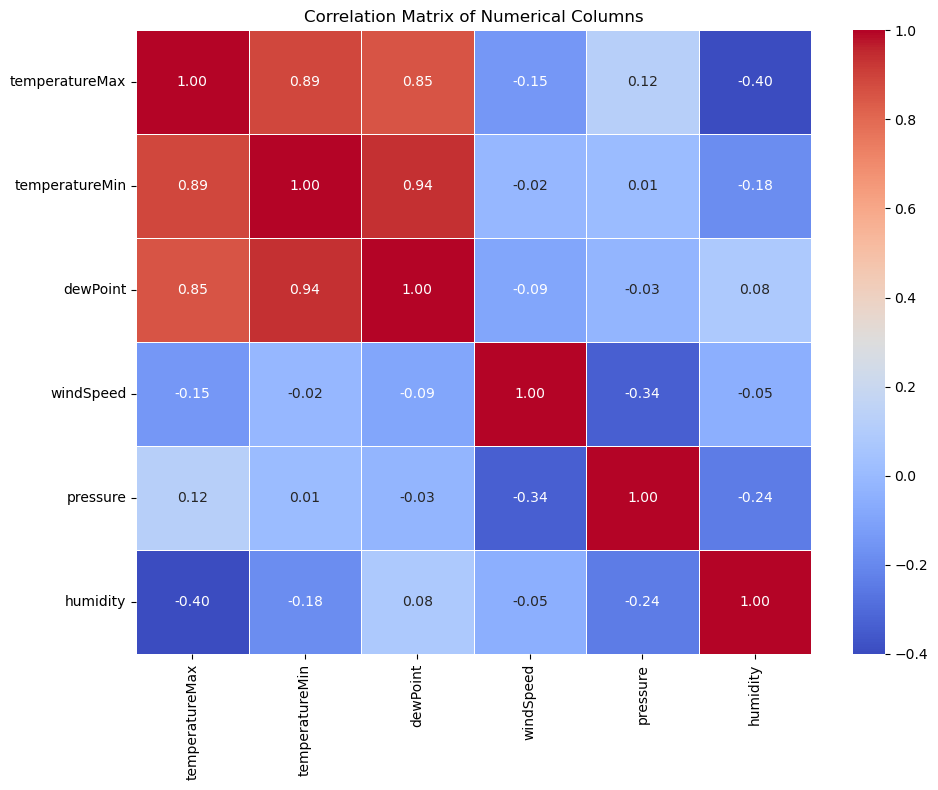

In [43]:
# Plot correlations between numerical columns
corr_matrix = df8[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()

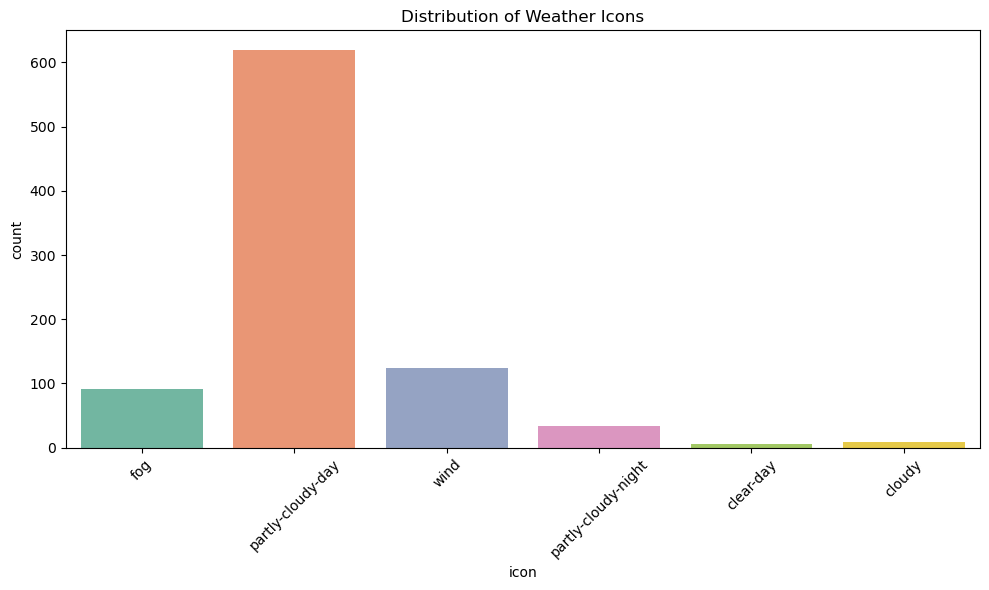

In [44]:
# Plot distribution of the 'icon' column (weather conditions)
plt.figure(figsize=(10, 6))
sns.countplot(x='icon', data=df8, palette='Set2')
plt.title('Distribution of Weather Icons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

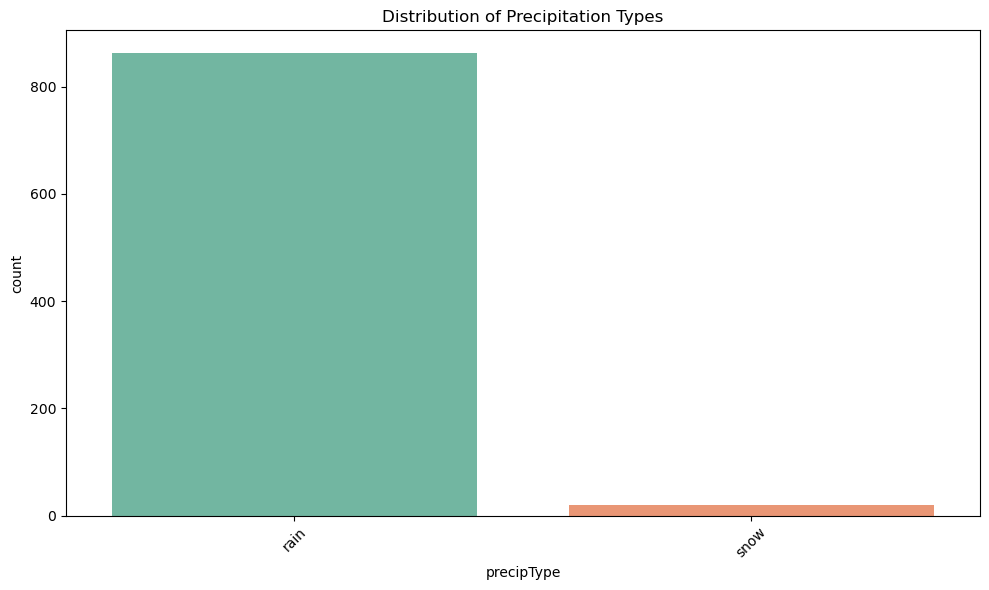

In [45]:
# Plot distribution of the 'precipType' column (precipitation types)
plt.figure(figsize=(10, 6))
sns.countplot(x='precipType', data=df8, palette='Set2')
plt.title('Distribution of Precipitation Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

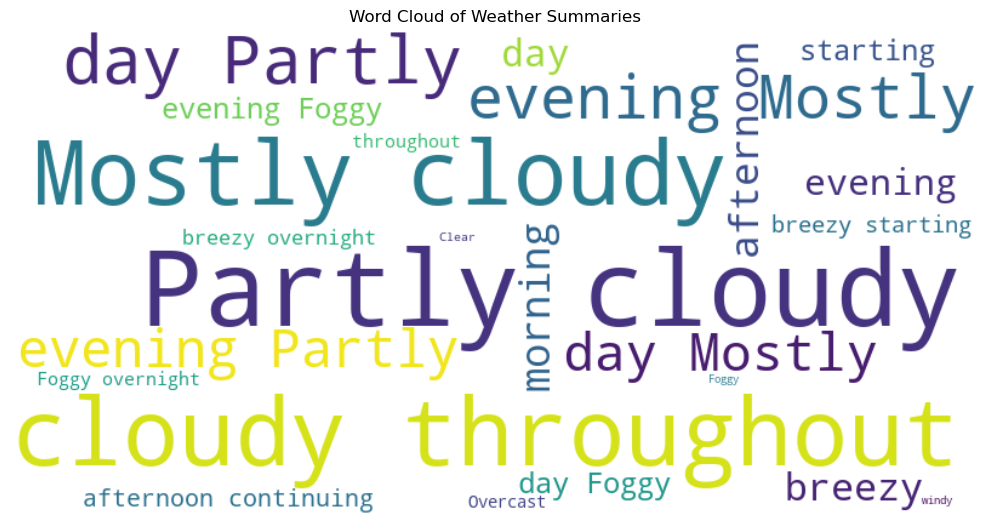

In [ ]:
# Plot distribution of the 'summary' column (weather summary)

# Combine all text in the 'summary' column into one large string
text = " ".join(summary for summary in df8['summary'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weather Summaries')
plt.tight_layout()
plt.show()

---

## <div id="#9-weather-hourly-darksky">  9. Weather Hourly Darksky </div>
`weather_hourly_darksky.csv`

In [50]:
# Read data
df9 = pd.read_csv("Data/9. weather_hourly_darksky.csv")
df9.head()

visibility  windBearing  temperature                 time  dewPoint  \
0        5.97          104        10.24  2011-11-11 00:00:00      8.86   
1        4.88           99         9.76  2011-11-11 01:00:00      8.83   
2        3.70           98         9.46  2011-11-11 02:00:00      8.79   
3        3.12           99         9.23  2011-11-11 03:00:00      8.63   
4        1.85          111         9.26  2011-11-11 04:00:00      9.21   

   pressure  apparentTemperature  windSpeed precipType                 icon  \
0   1016.76                10.24       2.77       rain  partly-cloudy-night   
1   1016.63                 8.24       2.95       rain  partly-cloudy-night   
2   1016.36                 7.76       3.17       rain  partly-cloudy-night   
3   1016.28                 7.44       3.25       rain                  fog   
4   1015.98                 7.24       3.70       rain                  fog   

   humidity        summary  
0      0.91  Partly Cloudy  
1      0.94  Partly Cloudy  
2      0.96  Partly Cloudy  
3      0.96          Foggy  
4      1.00          Foggy

In [51]:
# Print shape & columns
df9_shape = df8.shape
print(f"The shape of `df8` is: {df9_shape}")

df9_columns = df9.columns
df9_columns_count = len(df9_columns)
print(f"\n`df9` contains {df9_columns_count} columns: \n{df9_columns}")

The shape of `df8` is: (882, 32)

`df9` contains 12 columns: 
Index(['visibility', 'windBearing', 'temperature', 'time', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon',
       'humidity', 'summary'],
      dtype='object')


In [52]:
# Display basic info
print(df9.info())
print(df9.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21165 non-null  float64
 1   windBearing          21165 non-null  int64  
 2   temperature          21165 non-null  float64
 3   time                 21165 non-null  object 
 4   dewPoint             21165 non-null  float64
 5   pressure             21152 non-null  float64
 6   apparentTemperature  21165 non-null  float64
 7   windSpeed            21165 non-null  float64
 8   precipType           21165 non-null  object 
 9   icon                 21165 non-null  object 
 10  humidity             21165 non-null  float64
 11  summary              21165 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.9+ MB
None
         visibility   windBearing   temperature      dewPoint      pressure  \
count  21165.000000  21165.000000  21165.0000

In [53]:
# Check missing values
print(df9.isnull().sum())

visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
dtype: int64


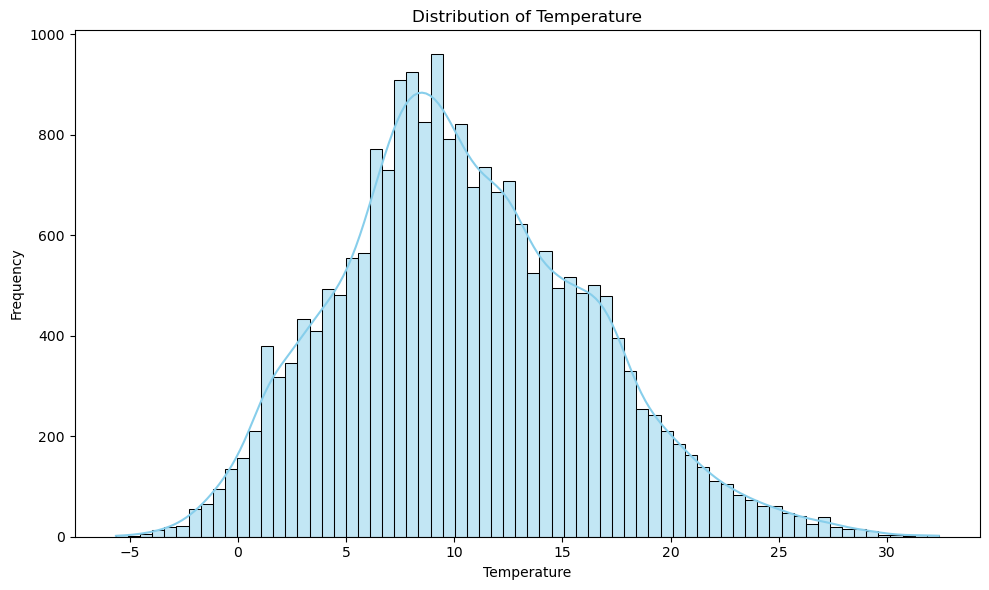

In [54]:
# Distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df9['temperature'], kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

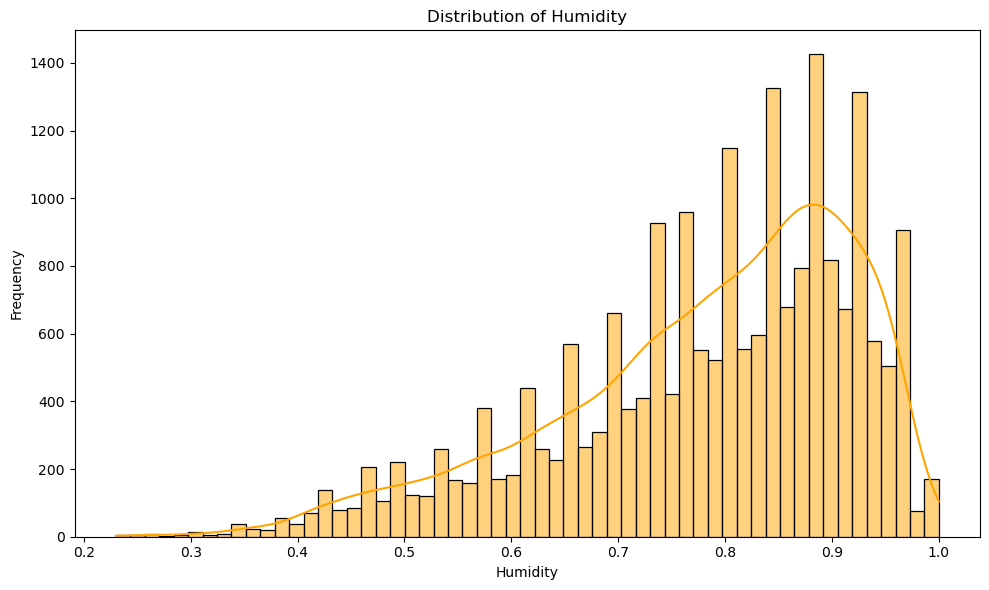

In [55]:
# Distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(df9['humidity'], kde=True, color='orange')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

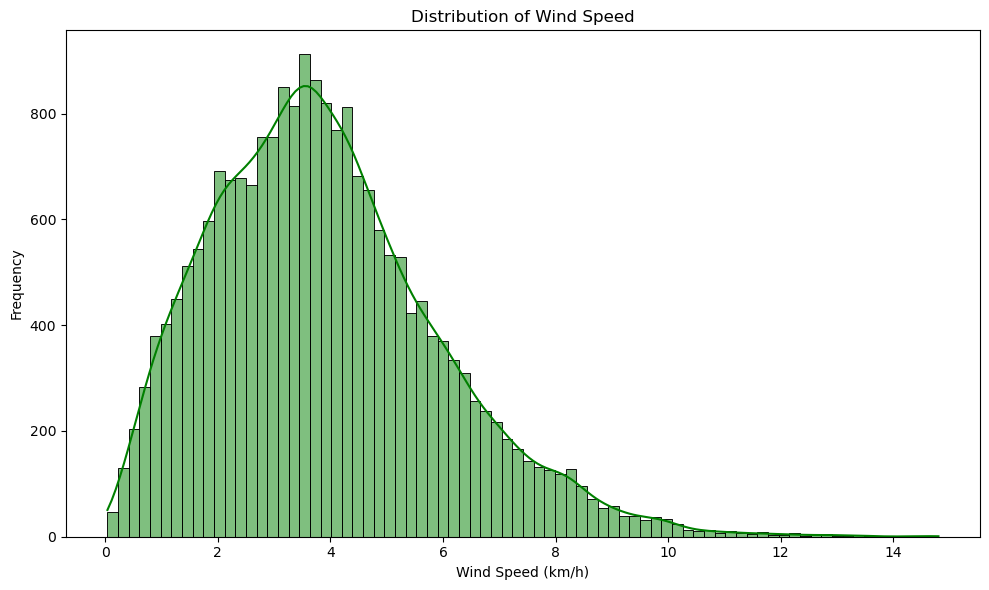

In [56]:
# Distribution of windSpeed
plt.figure(figsize=(10, 6))
sns.histplot(df9['windSpeed'], kde=True, color='green')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

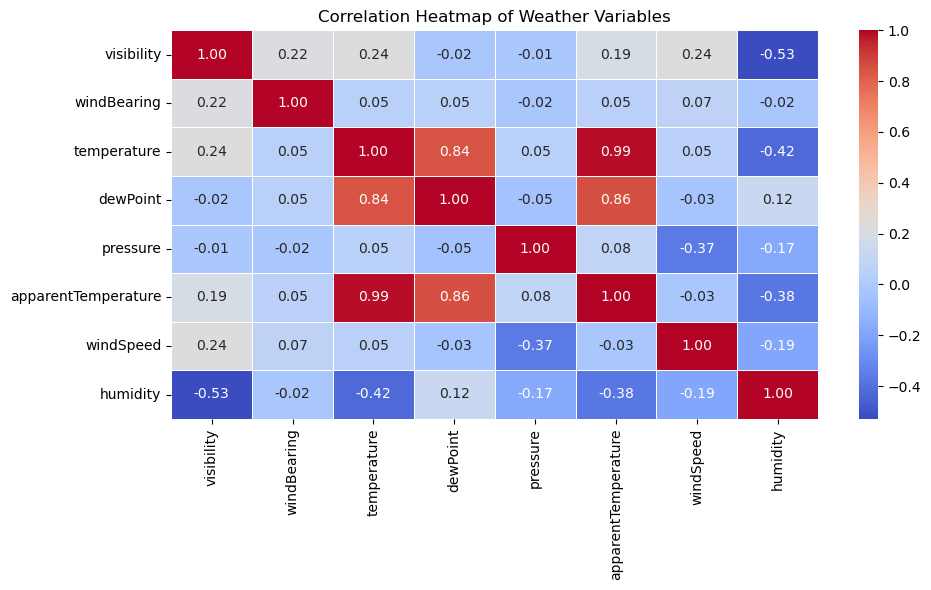

In [57]:
# Correlation Heatmap

# Compute the correlation matrix
corr_matrix = df9[['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 
                    'apparentTemperature', 'windSpeed', 'humidity']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

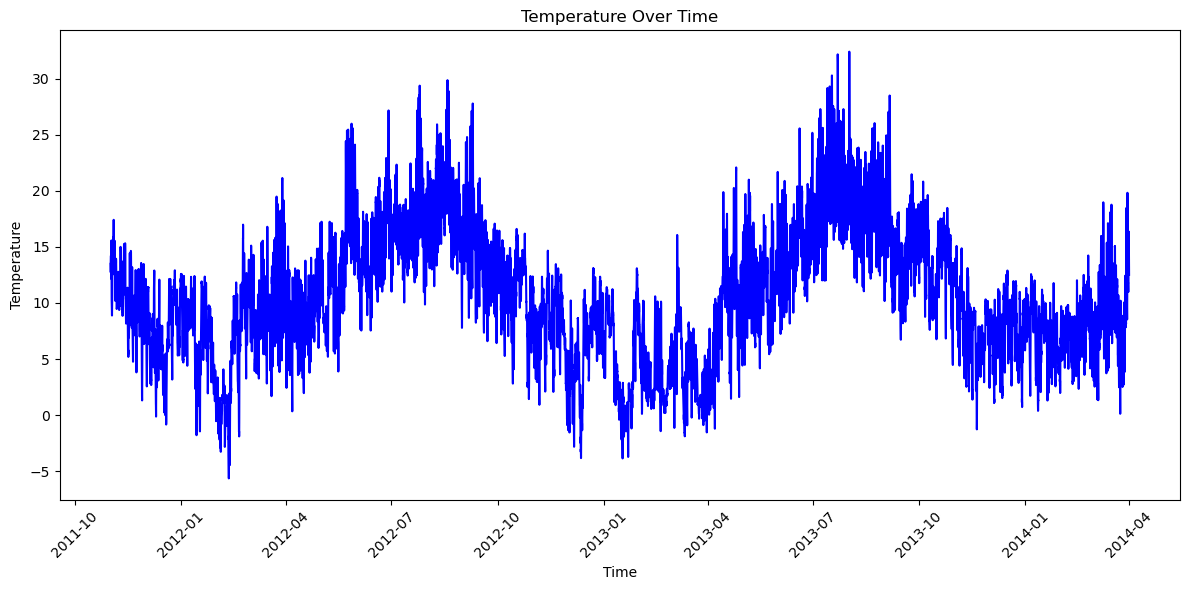

In [58]:
# Time Series of temperature

# Convert 'time' to datetime
df9['time'] = pd.to_datetime(df9['time'])

# Plot temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='temperature', data=df9, color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

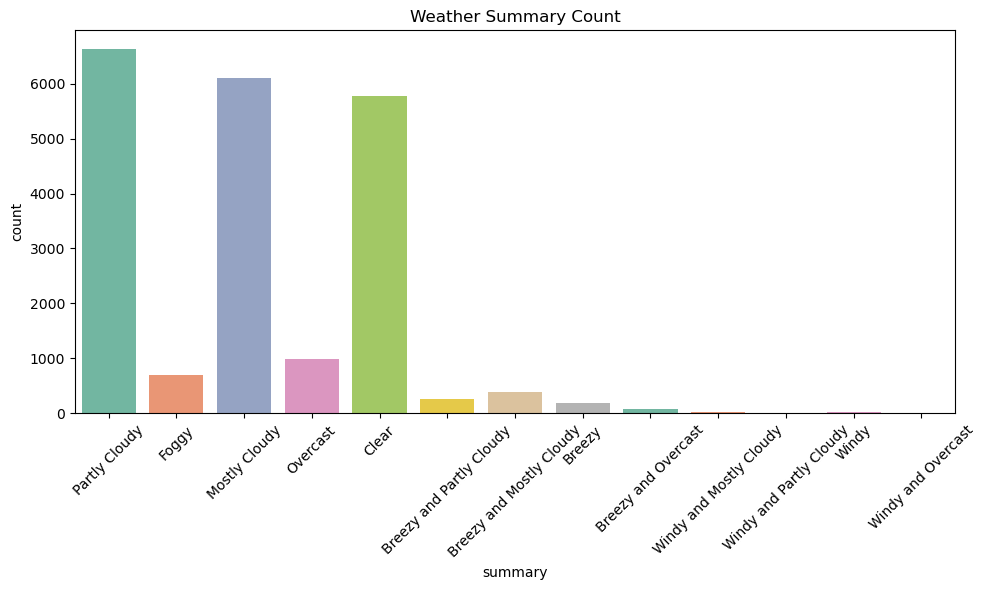

In [59]:
# Weather Summary Count
plt.figure(figsize=(10, 6))
sns.countplot(x='summary', data=df9, palette='Set2')
plt.title('Weather Summary Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()